In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patheffects as path_effects
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as plticker
import matplotlib.gridspec as gridspec

In [12]:
start_year = 1975
end_year = 2021

columns = ['IMAGE Region Name', 'time', 'NGFBFC']

colors = {'plant based fibres': '#4D869C',
          'non food, luxury, spices': '#7AB2B2',
          'vegetables & fruits': '#CDE8E5',
          'palm oil': '#FC4100',
          'sugar crops': '#FFC55A',
          'tropical roots & tubers': '#8E3E63',
          'temperate roots & tubers': '#D2649A',
          'tropical oil crops': '#03AED2',
          'temperate oil crops': '#68D2E8',
          'soybeans': '#5F6F52',
          'pulses': '#A9B388',
          'temperate cereals': '#FC819E',
          'tropical cereals': '#F7418F',
          'maize': '#FFF455',
          'rice': '#FFEFEF',
          'wheat': '#F7C566',
          "pasture": '#ACE1AF'}

colors_region = {'Oceania': '#B3C8CF',
 'Japan': '#E5E483',
 'Korea region': '#D2D180',
 'China region': '#B2B377',
 'Rest of South Asia': '#EF9595',
 'India': '#EFB495',
 'Indonesia region': '#FF8A08',
 'Southeast Asia': '#FFC100',
 'Middle East': '#AD88C6',
 'Central Asia': '#E1AFD1',
 'Russia region': '#FFE6E6',
 'Rest of Southern Africa': '#C75B7A',
 'South Africa': '#710019',
 'Eastern Africa': '#D43790',
 'Western Africa': '#EC8FD0',
 'Northern Africa': '#F2C5E0',
 'Turkey': '#6F4E37',
 'Ukraine region': '#A67B5B',
 'Central Europe': '#ECB176',
 'Western Europe': '#FED8B1',
 'Rest of South America': '#254336',
 'Brazil': '#00b2b2',
 'Central America': '#6B8A7A',
 'Mexico': '#003285',
 'USA': '#40A2E3',
 'Canada': '#BBE2EC'}

In [13]:
def ngfbfc_processing(df):
    try:
        if "type" in df.columns.to_list():
            df = df.rename(columns={"type": "NGFBFC"}) 

        if 'NGFBFC' in df.columns:
            df['NGFBFC'] = df['NGFBFC'].str.lower()
            if 'grass' in df['NGFBFC'].unique():
                df['NGFBFC'] = df['NGFBFC'].replace('grass', 'pasture')
            df['NGFBFC'] = df['NGFBFC'].replace("oil & palm fruit", "palm oil")
            df['NGFBFC'] = df['NGFBFC'].replace("other non-food & luxury & spices", "non food, luxury, spices")
            df['NGFBFC'] = df['NGFBFC'].replace('other temperate cereals', 'temperate cereals')
        return df
    except Exception as e:
        print(f"error: {e}")
        return df

def region_processing(df):
    try:
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
        return df
    except Exception as e:
        print(f"error: {e}")
        return df

def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0


def get_top_n(df, category_col, value_col, n=3):
    return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)

def get_angular_position(NGFBFC_name, NGFBFCs_list):
    """Calculate the angular position of a NGFBFC in the chart"""
    idx = NGFBFCs_list.index(NGFBFC_name)
    return (idx * 360.0 / len(NGFBFCs_list) + 90) % 360

In [14]:
GECH4RI = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECH4RI_rice_category_annual_gtco2eq.xlsx")
GECO2AB_CH4 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECO2AB_crop_category_annual_gtco2eq_CH4_13Jan.xlsx")
GECO2AB_N2O = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECO2AB_crop_category_annual_gtco2eq_N2O_13Jan.xlsx")
GEC2OLC = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GEN2OLC_crop_category_annual_gtco2eq.xlsx")
GEN2ORE = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GEN2ORE_crop_category_annual_gtco2eq_13Jan.xlsx")
GFERTYN = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GFERTSYN_crop_category_annual_gtco2eq.xlsx")
GMANURE = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GMANURE_crop_category_annual_gtco2eq.xlsx")
LUC_total = pd.read_excel("D:/kerja/asisten riset/code v/review/data/LUC_total_crop_category_annual_gtco2eq.xlsx")
peat_CH4 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_CH4_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_CO2 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_CO2_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_DOC = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_DOC_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_N2O = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_N2O_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
LUC_agri = pd.read_excel("D:/kerja/asisten riset/code v/review/data/LUC_agri_crop_category_annual_gtco2eq.xlsx")
agri_to_agri = pd.read_excel("D:/kerja/asisten riset/code v/review/data/agri2agri_crop_category_annual_gtco2eq.xlsx")

country_code = pd.read_excel("D:/kerja/asisten riset/FULL_RUN/INPUT_DATA/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

w_factor_intensity =  pd.read_excel("D:/kerja/asisten riset/FULL_RUN/OUTPUT_DATA/REV_fao_stat_production_mov_average_v2_REGION.xlsx", engine='openpyxl')

columns_year_analysis = [int(year) for year in range(start_year, end_year, 5)]

df_GFRACcombined = pd.read_excel("GFRACcombined_area_concat.xlsx")

GECH4RI = ngfbfc_processing(GECH4RI)
GECO2AB_CH4 = ngfbfc_processing(GECO2AB_CH4)
GECO2AB_N2O = ngfbfc_processing(GECO2AB_N2O)
GEC2OLC = ngfbfc_processing(GEC2OLC)
GEN2ORE = ngfbfc_processing(GEN2ORE)
GFERTYN = ngfbfc_processing(GFERTYN)
GMANURE = ngfbfc_processing(GMANURE)
LUC_agri = ngfbfc_processing(LUC_agri)
agri_to_agri = ngfbfc_processing(agri_to_agri)

peat_CH4 = ngfbfc_processing(peat_CH4)
peat_CO2 = ngfbfc_processing(peat_CO2)
peat_DOC = ngfbfc_processing(peat_DOC)
peat_N2O = ngfbfc_processing(peat_N2O)

all_sources = pd.concat([LUC_agri, agri_to_agri, GEC2OLC, GECH4RI, GECO2AB_CH4, GECO2AB_N2O, GEN2ORE, GFERTYN, GMANURE, peat_CH4, peat_CO2, peat_DOC, peat_N2O], ignore_index=True)
all_sources.loc[:, columns_year_analysis] = all_sources.loc[:, columns_year_analysis] * 5

all_sources_copy = all_sources.copy()
all_sources_copy.rename(columns={'emissions': 'Process'}, inplace=True)
all_sources_copy['Process'] = all_sources_copy['Process'].str.replace("peat_DOC", 'peat_CO2')

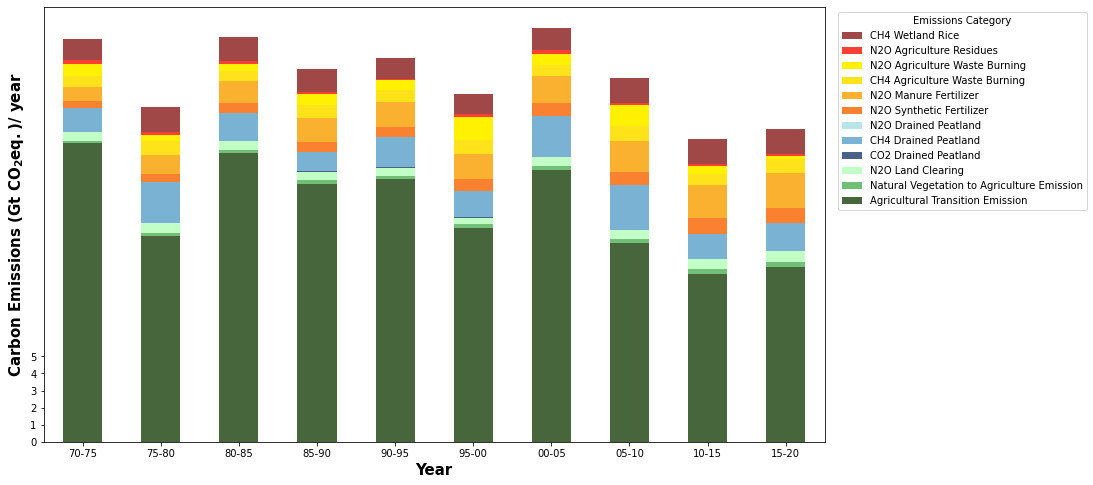

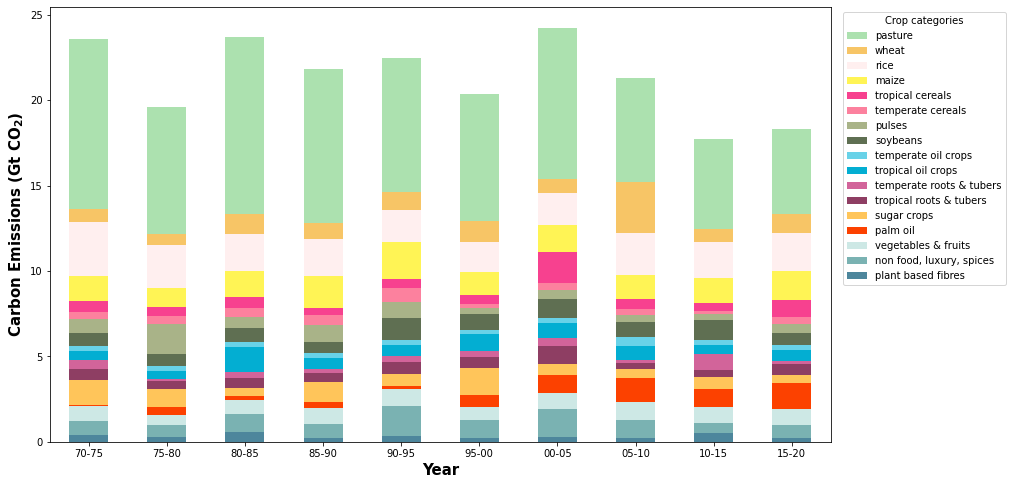

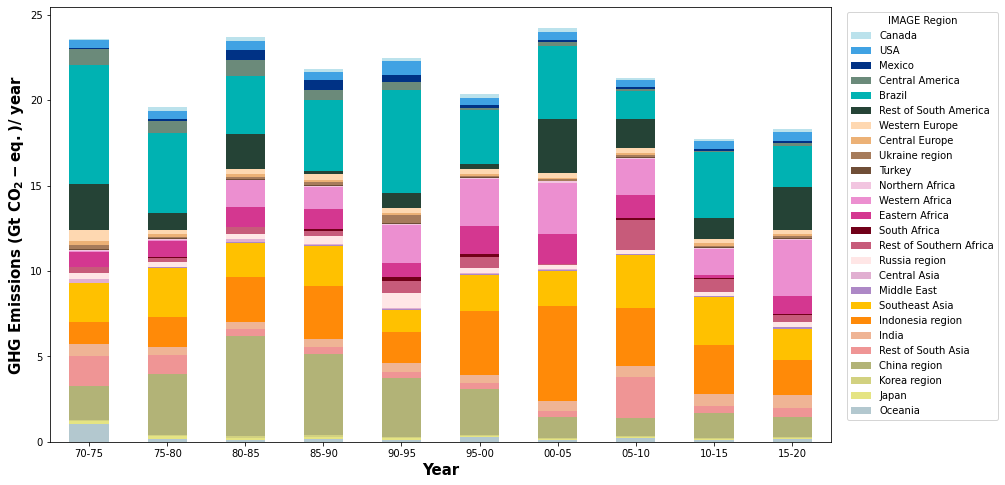

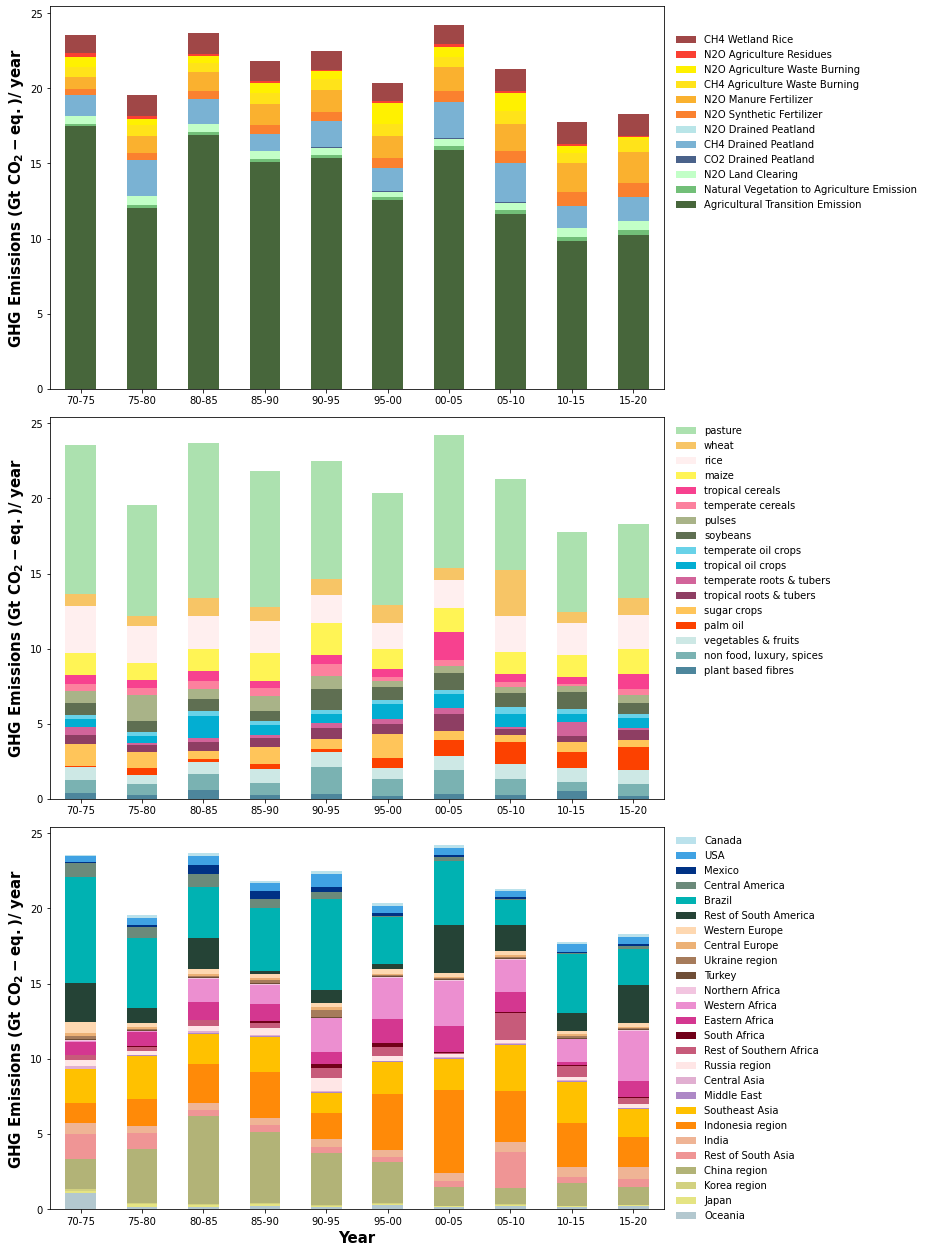

In [15]:
tahun = []
for time in columns_year_analysis:
    n_awal = time - 5
    tahun.append(f'{str(n_awal)[2:]}-{str(time)[2:]}')

all_sources_process = all_sources_copy.groupby(['Process']).sum()
all_sources_process_reset = all_sources_process.reset_index()

all_sources_process_drop = all_sources_process_reset.drop(columns=['IMAGE Region Name','NGFBFC'])
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('LUC_Agri', 'Natural Vegetation to Agriculture Emission')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('agri2agri', 'Agricultural Transition Emission')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('GEN2OLC', 'N2O Land Clearing')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('GECH4RI', 'CH4 Wetland Rice')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('agri_burn_CH4', 'CH4 Agriculture Waste Burning')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('agri_burn_N2O', 'N2O Agriculture Waste Burning')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('GEN2ORE', 'N2O Agriculture Residues')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('GFERTSYN', 'N2O Synthetic Fertilizer')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('GMANURE', 'N2O Manure Fertilizer')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('peat_CH4', 'CH4 Drained Peatland')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('peat_CO2', 'CO2 Drained Peatland')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('peat_CH4', 'CH4 Drained Peatland')
all_sources_process_drop['Process'] = all_sources_process_drop['Process'].replace('peat_N2O', 'N2O Drained Peatland')

new_columns_order_process = [6,5,1,9,10,11,3,4,7,8,2,0]
all_sources_process_reordered = all_sources_process_drop.reindex(new_columns_order_process)
all_sources_process_reordered = all_sources_process_reordered.reset_index()
all_sources_process_reordered = all_sources_process_reordered.drop(columns = "index")
all_sources_process_reordered_index = all_sources_process_reordered.set_index('Process')
value_all_sources_process = all_sources_process_reordered_index.T.values

columns1 = ['Agricultural Transition Emission','Natural Vegetation to Agriculture Emission', 'N2O Land Clearing',
'CO2 Drained Peatland', 'CH4 Drained Peatland','N2O Drained Peatland', 
'N2O Synthetic Fertilizer','N2O Manure Fertilizer',
'CH4 Agriculture Waste Burning', 'N2O Agriculture Waste Burning','N2O Agriculture Residues',
'CH4 Wetland Rice']

colors1 = [
          '#47663B', #Agri Trans
          '#72BF78', #LUC Agri
          '#C2FFC7', #N2O Land clearing
          '#4A628A', #CO2 peat
          '#7AB2D3', #CH4 peat
          '#B9E5E8', #NO2 peat
          '#FA812F', #manure
          '#FAB12F', #synthetic
          '#FFE31A', #burning CH4
          '#FFF100', #burning N2O
          '#FA4032', #agri residue
          '#A04747', #rice
          ]

panel_A = pd.DataFrame(value_all_sources_process, index=tahun, columns=columns1)
ax1 = panel_A.plot(kind='bar', stacked=True, color=colors1, figsize=(14, 8), legend=False)

plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel(r"$\bf{Carbon\ Emissions\ (Gt~CO_2 eq.)/\ year}$", fontsize=15)
plt.xticks([r for r in range(len(tahun))], tahun, rotation=0)
plt.axhline(0, color='black', linewidth=0.8)

yticks = np.arange(0, 6, 1)
plt.yticks(yticks)

handles = []
handles, labels = ax1.get_legend_handles_labels()
labels.append('Average annual emission (Gt CO2/ year)')

order1 = [11,10,9,8,7,6,5,4,3,2,1,0]
ax1.legend([handles[idx] for idx in order1], [labels[idx] for idx in order1], title='Emissions Category', loc='upper left', bbox_to_anchor=(1.01, 1.0), ncol=1)
plt.show()

all_source_crops = all_sources_copy.groupby(['NGFBFC']).sum()
all_source_crops_reset = all_source_crops.reset_index()
all_source_crops_drop = all_source_crops_reset.drop(columns=['IMAGE Region Name','Process'])
all_source_crops_drop['NGFBFC'] = all_source_crops_drop['NGFBFC'].replace('grass', 'pasture')
all_source_crops_drop = ngfbfc_processing(all_source_crops_drop)

all_source_crops_drop.set_index('NGFBFC', inplace=True)

all_source_crops_reorder = all_source_crops_drop.reindex(list(colors.keys()))
value_all_sources_crops = all_source_crops_reorder.T.values

panel_B = pd.DataFrame(value_all_sources_crops, index=tahun, columns=list(colors.keys()))
ax2 = panel_B.plot(kind='bar', stacked=True, color=list(colors.values()), figsize=(14, 8), legend=False)
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel(r"$\bf{Carbon\ Emissions\ (Gt~CO_2)}$", fontsize=15)
plt.xticks([r for r in range(len(tahun))], tahun, rotation=360)
plt.axhline(0, color='black', linewidth=0.8)

handles, labels = ax2.get_legend_handles_labels()
labels.append('Average annual emission (Gt CO2/ year)')

order2 = [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
ax2.legend([handles[idx] for idx in order2], [labels[idx] for idx in order2], title='Crop categories', loc='upper right', bbox_to_anchor=(1.23, 1.0), ncol=1)

plt.show()

all_sources_region = all_sources_copy.groupby(['IMAGE Region Name']).sum()
all_sources_region_reset = all_sources_region.reset_index()
all_sources_region_drop = all_sources_region_reset.drop(columns=['Process','NGFBFC'])
all_sources_region_drop = region_processing(all_sources_region_drop)

all_sources_region_drop = all_sources_region_drop.set_index("IMAGE Region Name")

all_source_region_reorder = all_sources_region_drop.reindex(list(colors_region.keys()))
value_all_sources_region = all_source_region_reorder.T.values

panel_C = pd.DataFrame(value_all_sources_region, index=tahun, columns=list(colors_region.keys()))
ax3 = panel_C.plot(kind='bar', stacked=True, color=list(colors_region.values()), figsize=(14, 8), legend=False)

plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel(r"$\bf{GHG\ Emissions\ (Gt~CO_2-eq.)/\ year}$", fontsize=15)
plt.xticks([r for r in range(len(tahun))], tahun, rotation=360)
plt.axhline(0, color='black', linewidth=0.8)

handles, labels = ax3.get_legend_handles_labels()
order3 = [25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
ax3.legend([handles[idx] for idx in order3], [labels[idx] for idx in order3], title='IMAGE Region', loc='upper right', bbox_to_anchor=(1.22, 1.0), ncol=1)
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(13, 18))
axs[0] = panel_A.plot(kind='bar', stacked=True, color=colors1, ax=axs[0], legend=False)
axs[0].set_ylabel(r"$\bf{GHG\ Emissions\ (Gt~CO_2-eq.)/\ year}$", fontsize=15)
axs[0].set_xticks([r for r in range(len(tahun))])
axs[0].set_xticklabels(tahun, rotation=0)
axs[0].axhline(0, color='black', linewidth=0.8)

axs[1] = panel_B.plot(kind='bar', stacked=True, color=list(colors.values()), ax=axs[1], legend=False)
axs[1].set_ylabel(r"$\bf{GHG\ Emissions\ (Gt~CO_2-eq.)/\ year}$", fontsize=15)
axs[1].set_xticks([r for r in range(len(tahun))])
axs[1].set_xticklabels(tahun, rotation=360)
axs[1].axhline(0, color='black', linewidth=0.8)

axs[2] = panel_C.plot(kind='bar', stacked=True, color=list(colors_region.values()), ax=axs[2], legend=False)
axs[2].set_ylabel(r"$\bf{GHG\ Emissions\ (Gt~CO_2-eq.)/\ year}$", fontsize=15)
axs[2].set_xticks([r for r in range(len(tahun))])
axs[2].set_xticklabels(tahun, rotation=360)
axs[2].axhline(0, color='black', linewidth=0.8)
axs[2].set_xlabel('Year', fontweight='bold', fontsize=15)

bbox_transform = fig.transFigure
plt.rc('text', usetex=False)

handles1, labels1 = axs[0].get_legend_handles_labels()
axs[0].legend([handles1[idx] for idx in order1], [labels1[idx] for idx in order1] ,edgecolor='white',loc='upper left', bbox_to_anchor=(1.005, 0.95))

handles2, labels2 = axs[1].get_legend_handles_labels()
axs[1].legend([handles2[idx] for idx in order2], [labels2[idx] for idx in order2], edgecolor='white', loc='upper left', bbox_to_anchor=(1.005, 1), ncol=1)

handles3, labels3 = axs[2].get_legend_handles_labels()
axs[2].legend([handles3[idx] for idx in order3], [labels3[idx] for idx in order3],edgecolor='white', loc='upper left', bbox_to_anchor=(1.005, 1), ncol=1)

plt.subplots_adjust(hspace=0.001)
plt.tight_layout()
plt.show()

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


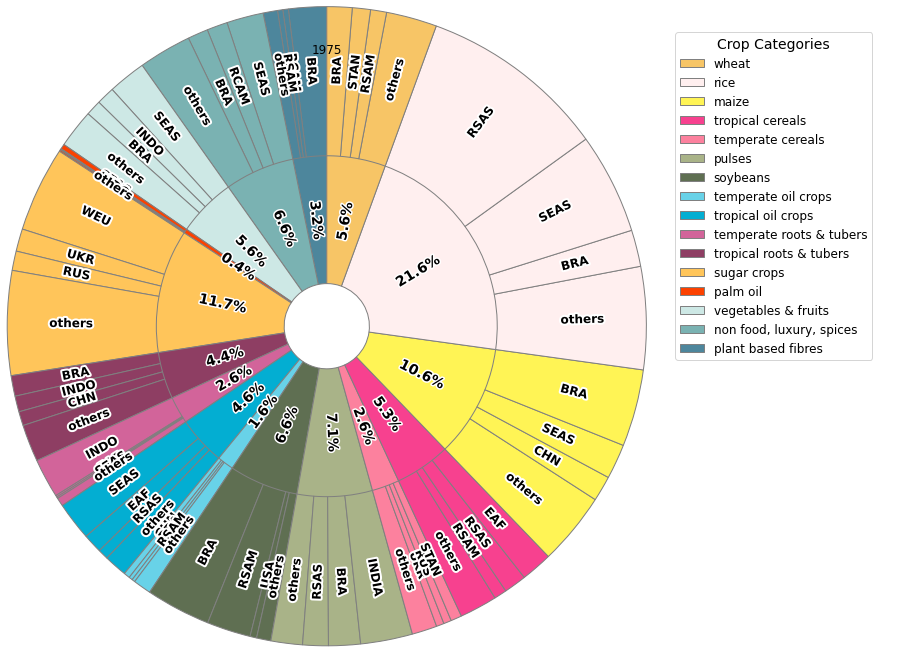

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


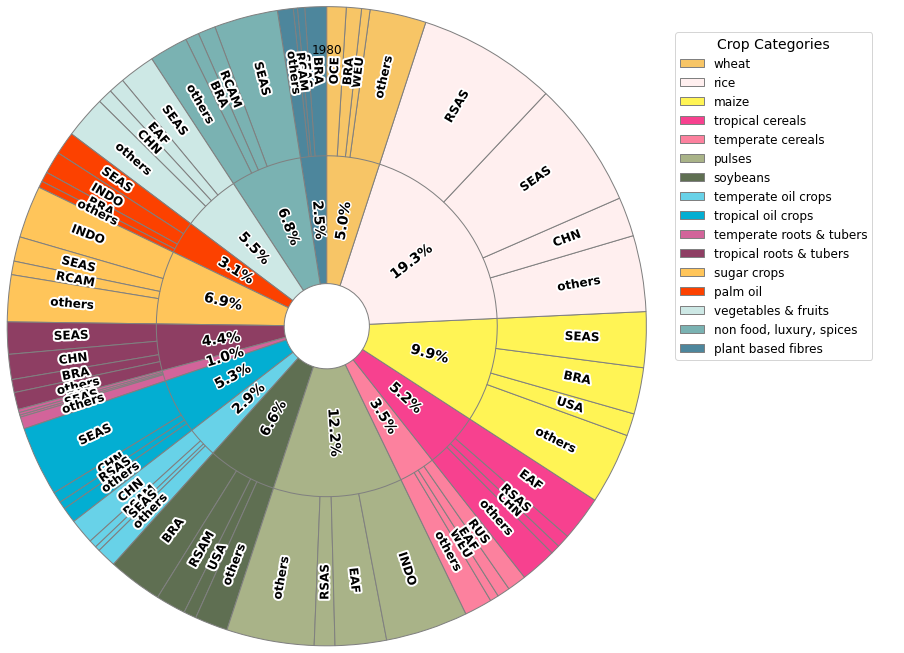

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


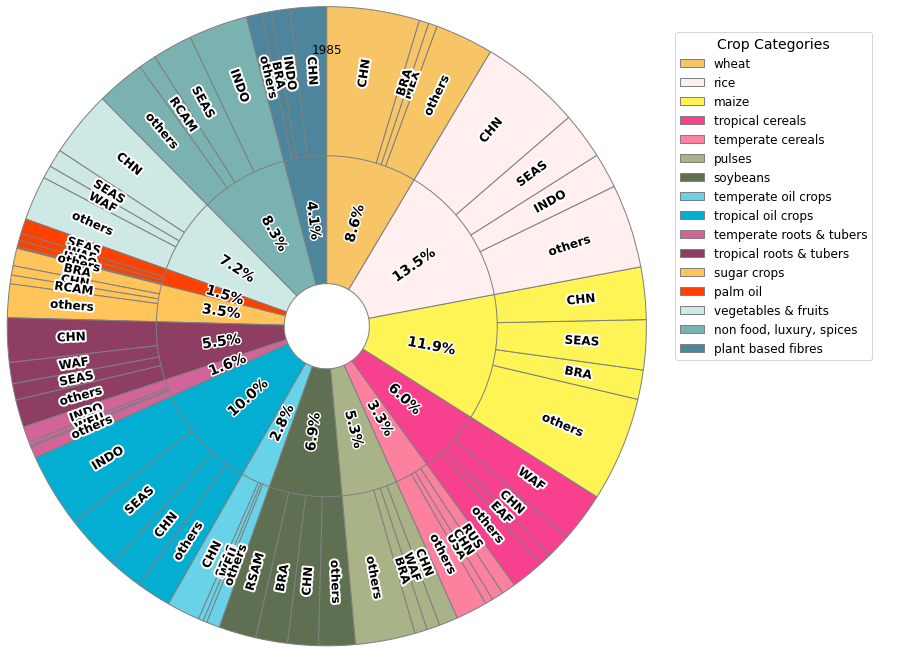

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


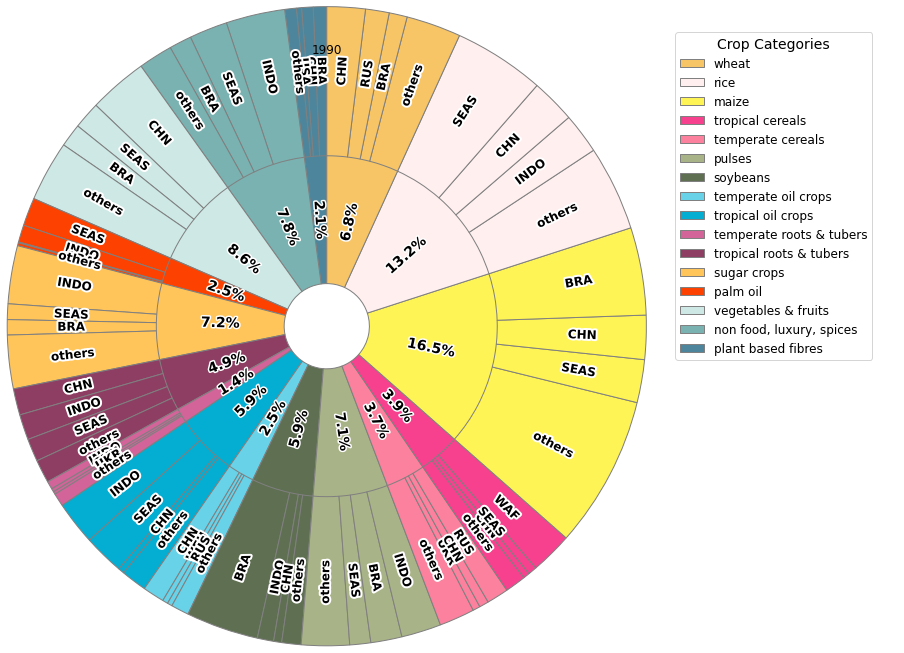

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


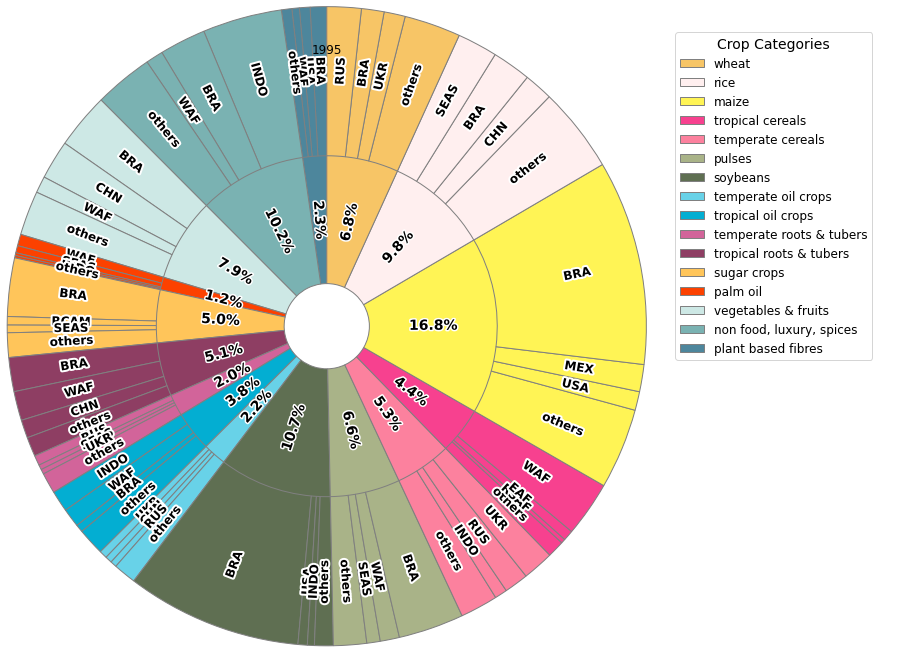

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


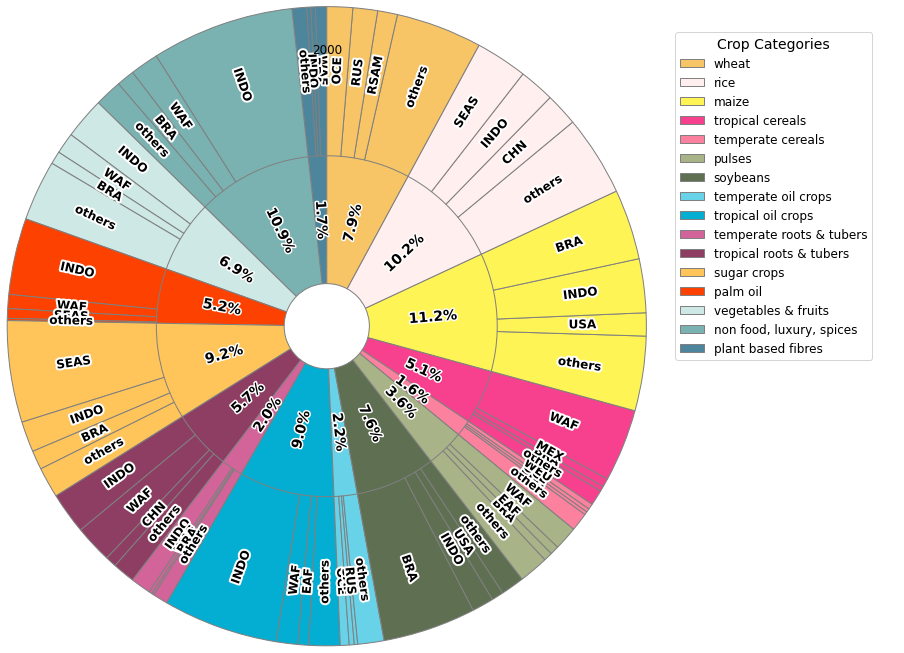

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


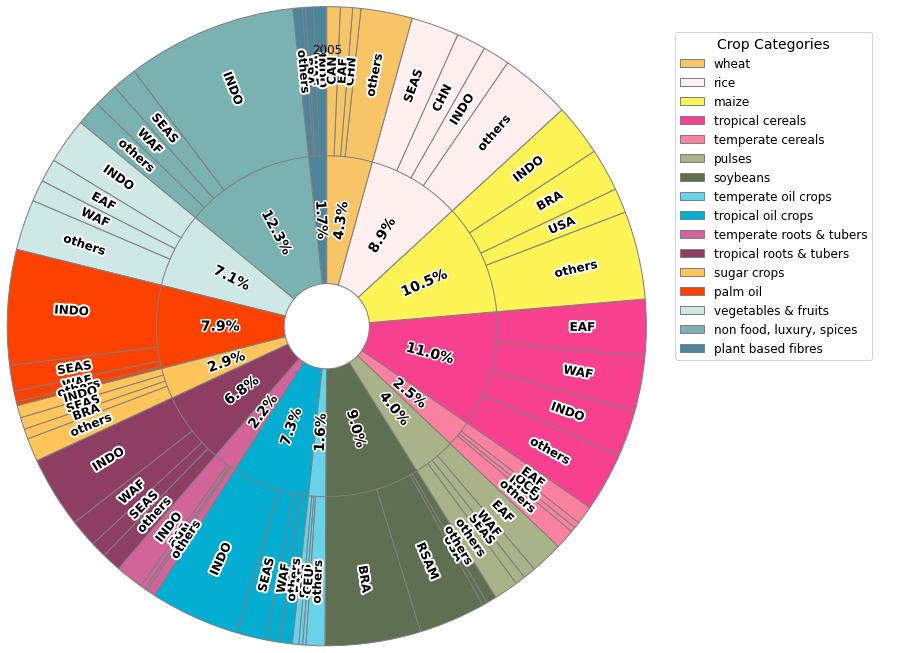

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


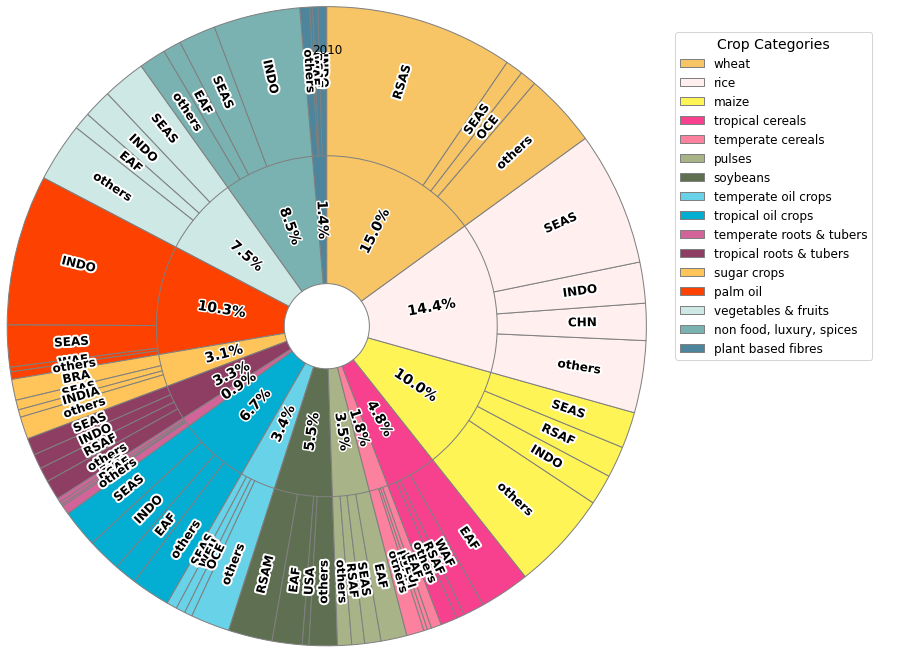

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


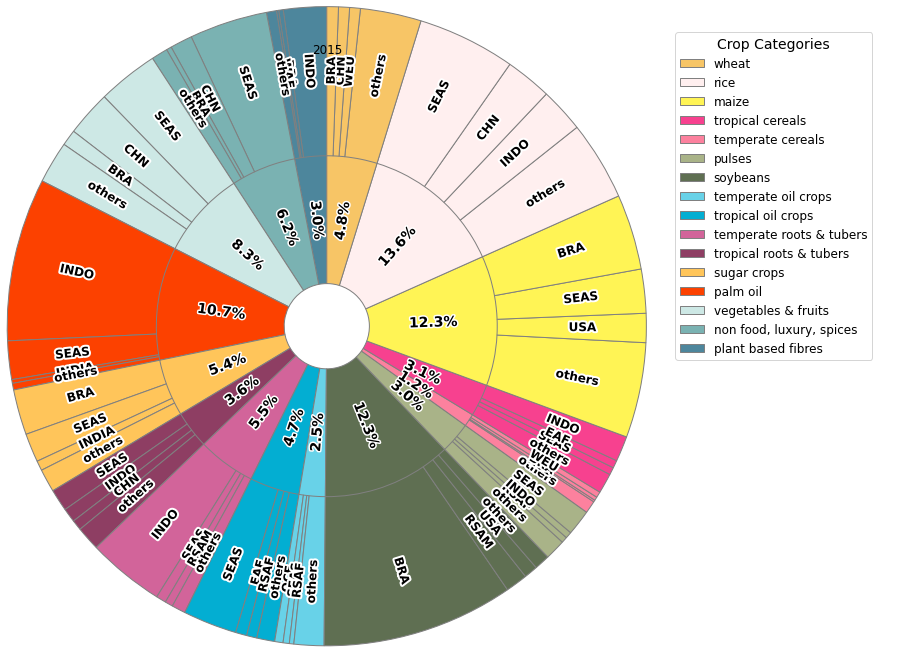

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


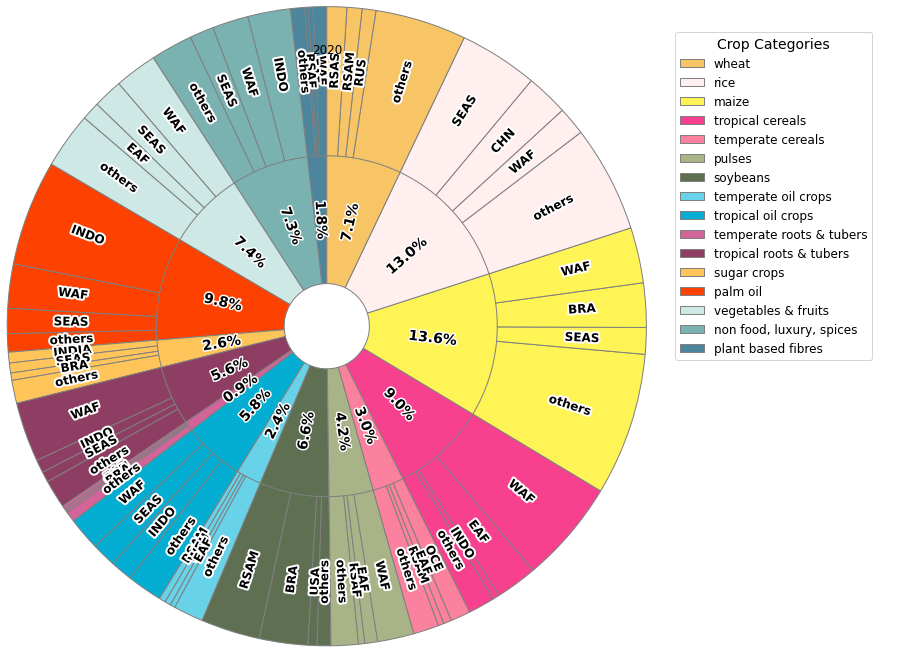

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/315768607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


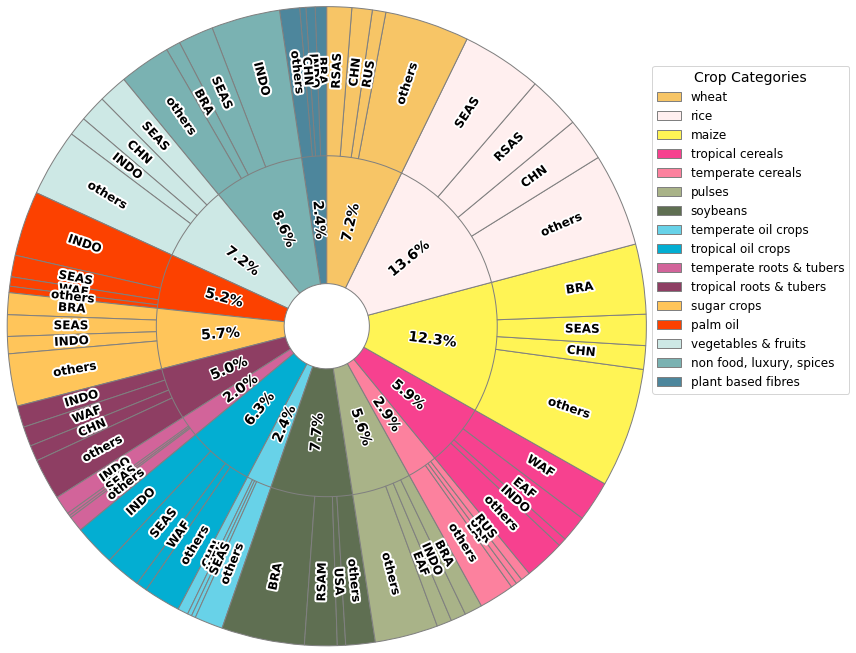

In [25]:
colors = {'plant based fibres': '#4D869C',
          'non food, luxury, spices': '#7AB2B2',
          'vegetables & fruits': '#CDE8E5',
          'palm oil': '#FC4100',
          'sugar crops': '#FFC55A',
          'tropical roots & tubers': '#8E3E63',
          'temperate roots & tubers': '#D2649A',
          'tropical oil crops': '#03AED2',
          'temperate oil crops': '#68D2E8',
          'soybeans': '#5F6F52',
          'pulses': '#A9B388',
          'temperate cereals': '#FC819E',
          'tropical cereals': '#F7418F',
          'maize': '#FFF455',
          'rice': '#FFEFEF',
          'wheat': '#F7C566',
          }

all_sources_copy = all_sources[all_sources['NGFBFC'] != 'pasture']

df_LUC = all_sources_copy[(all_sources_copy['emissions'] == 'LUC_Agri') | (all_sources_copy['emissions'] == 'agri2agri') | (all_sources_copy['emissions'] == 'GEN2OLC')]
df_LUC = df_LUC.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_LUC = df_LUC.reset_index()
df_LUC = df_LUC.drop(columns=['emissions'])
df_LUC.loc[:, columns_year_analysis] = df_LUC[columns_year_analysis].values * 5

df_AGRI = all_sources_copy[~(all_sources_copy['emissions'] == 'LUC_Agri') | ~(all_sources_copy['emissions'] == 'agri2agri') | ~(all_sources_copy['emissions'] == 'GEN2OLC')]
df_AGRI = df_AGRI.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_AGRI = df_AGRI.reset_index()
df_AGRI = df_AGRI.drop(columns=['emissions'])
df_AGRI.loc[:, columns_year_analysis] = df_AGRI[columns_year_analysis].values * 5

df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_LUC_melt.loc[:, 'emissions'] = "LUC"

df_AGRI_melt = df_AGRI.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_AGRI_melt.loc[:, 'emissions'] = "AGRI"

data_2kategori = pd.concat([df_LUC_melt, df_AGRI_melt], ignore_index=True)
data_2kategori_drop = data_2kategori.drop(columns=['emissions'])
data_2kategori_sum = data_2kategori_drop.groupby(columns).sum()
data_2kategori_sum = data_2kategori_sum.reset_index()

region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()
data_2kategori_sum['IMAGE Region Name'] = data_2kategori_sum['IMAGE Region Name'].map(region_code_map)


for time in columns_year_analysis:
    # Convert the data into a DataFrame
    df = data_2kategori_sum[data_2kategori_sum['time'] == time]

    # Keep only top 3 values for each category
    df_top3 = get_top_n(df, 'NGFBFC', 'value', 3)

    # Calculate the total for each NGFBFC in the original DataFrame
    total_per_NGFBFC = df.groupby('NGFBFC')['value'].sum().reset_index()

    # Calculate the total for top 3
    total_top3 = df_top3.groupby('NGFBFC')['value'].sum().reset_index()

    # Calculate the others by subtracting top 3 from the total
    df_others_sum = total_per_NGFBFC.merge(total_top3, on='NGFBFC', how='left', suffixes=('', '_top3'))
    df_others_sum['value'] = df_others_sum['value'] - df_others_sum['value_top3'].fillna(0)
    df_others_sum = df_others_sum[df_others_sum['value'] > 0]  # Keep only positive values
    df_others_sum['IMAGE Region Name'] = "others"

    # Combine top 3 and others
    df_combined = pd.concat([df_top3, df_others_sum[['NGFBFC', 'value', 'IMAGE Region Name']]], ignore_index=True)
    df_combined = df_combined[df_combined['NGFBFC'] != 'pasture']

    # Sorting the data to match the order of colors in the legend
    df_combined['color_order'] = df_combined['NGFBFC'].map(lambda x: list(colors.keys()).index(x) if x in colors else len(colors))
    df_combined = df_combined.sort_values('color_order').drop('color_order', axis=1)

    # Ring 1: Total per NGFBFC
    ring1_data = df_combined.groupby('NGFBFC')['value'].sum()
    ring1_labels = [i for i in colors.keys() if i != 'pasture']
    ring1_data = ring1_data.reindex(ring1_labels)
    ring1_colors = [colors[label] for label in ring1_labels]

    # Calculate percentages for ring 1
    ring1_percent = ring1_data / ring1_data.sum() * 100

    # Calculate initial ring2_data
    ring2_data = df_combined.groupby(['NGFBFC', 'IMAGE Region Name'])['value'].sum()

    # Sort data within each NGFBFC while preserving MultiIndex
    NGFBFCs_list = list(colors.keys())
    final_data = []

    for NGFBFC_name in NGFBFCs_list:
        if NGFBFC_name in ring2_data.index.get_level_values(0):
            NGFBFC_data = ring2_data.xs(NGFBFC_name)
            angle = get_angular_position(NGFBFC_name, NGFBFCs_list)
            
            # Extract and sort non-others data
            others_value = NGFBFC_data['others'] if 'others' in NGFBFC_data.index else None
            non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=False)
            
            # Create sorted data based on angular position
            if 300 <= angle or angle <= 70:
                non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=True)
                # For upper half, others goes first
                if others_value is not None:
                    regions = ['others'] + non_others.index.tolist()
                    values = [others_value] + non_others.values.tolist()
                else:
                    regions = non_others.index.tolist()
                    values = non_others.values.tolist()
            else:
                # For lower half, others goes last
                if others_value is not None:
                    regions = non_others.index.tolist() + ['others']
                    values = non_others.values.tolist() + [others_value]
                else:
                    regions = non_others.index.tolist()
                    values = non_others.values.tolist()
            
            # Create MultiIndex entries for this NGFBFC
            for region, value in zip(regions, values):
                final_data.append(((NGFBFC_name, region), value))

    # Convert to Series with MultiIndex
    ring2_data = pd.Series(dict(final_data))
    ring2_labels = ring2_data.index.get_level_values(1)

    # Update ring2_colors to match the new ordering
    ring2_colors = []
    for NGFBFC_name in colors.keys():
        if NGFBFC_name in ring2_data.index.get_level_values(0):
            NGFBFC_data = ring2_data.xs(NGFBFC_name)
            ring2_colors.extend([colors[NGFBFC_name]] * len(NGFBFC_data))

    # Plotting
    # Create Figure and GridSpec Layout
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.2, wspace=0.2, width_ratios=[7,3], height_ratios=[7,3])
    ax = fig.add_subplot(gs[:, 0], aspect="equal")

    plt.title(f"{time}")

    # Plot the inner ring
    inner_pie, _ = ax.pie(ring1_data, radius=1.2, colors=ring1_colors, wedgeprops=dict(width=1, edgecolor='#808080'), startangle=90)
    outer_pie, _ = ax.pie(ring2_data, radius=1.5, colors=ring2_colors, wedgeprops=dict(width=0.7, edgecolor='#808080'), startangle=90)

    # Add text annotations for the inner ring
    for i, (label, percent) in enumerate(zip(ring1_labels, ring1_percent)):
        ang = (inner_pie[i].theta2 + inner_pie[i].theta1) / 2
        x = 0.5 * np.cos(np.deg2rad(ang))
        y = 0.5 * np.sin(np.deg2rad(ang))
        rotation = ang + 180 if 90 <= ang <= 270 else ang
        ax.text(x, y, f'{percent:.1f}%', ha='center', va='center', rotation=rotation, 
                color='black', fontsize=14, fontweight='bold',
                path_effects=[path_effects.Stroke(linewidth=3, foreground='white'), 
                            path_effects.Normal()])

    # Add text annotations for the outer ring
    for i, label in enumerate(ring2_labels):
        ang = (outer_pie[i].theta2 + outer_pie[i].theta1) / 2
        x = 1.2 * np.cos(np.deg2rad(ang))
        y = 1.2 * np.sin(np.deg2rad(ang))
        rotation = ang + 180 if 90 <= ang <= 270 else ang
        ax.text(x, y, f'{label}', ha='center', va='center', rotation=rotation,
                color='black', fontsize=12, fontweight='bold',
                path_effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                            path_effects.Normal()])

    # Adding legend
    legend_handles = [plt.Rectangle((0, 0), 1, 1, edgecolor='#808080', facecolor=color) for color in dict(reversed(colors.items())).values()]
    
    # Menambahkan legend ke kuadran kanan atas
    legend_ax = fig.add_subplot(gs[0, 1])
    legend_ax.axis('off')  # Sembunyikan sumbu
    legend_ax.legend(handles=legend_handles,
            labels=[label for label in dict(reversed(colors.items())).keys()],
            title="Crop Categories", title_fontsize=14,
            bbox_to_anchor=(0,0.1), loc="lower left", fontsize=12)

    plt.show()

df_AGRI_melt = df_AGRI.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_AGRI_melt = df_AGRI_melt.drop(columns=['time'])
df_AGRI_groupby = df_AGRI_melt.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_AGRI_index = df_AGRI_groupby.reset_index()
df_AGRI_index.loc[:, 'emissions'] = "AGRI"

df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_LUC_melt = df_LUC_melt.drop(columns=['time'])
df_LUC_groupby = df_LUC_melt.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_LUC_index = df_LUC_groupby.reset_index()
df_LUC_index.loc[:, 'emissions'] = "LUC"

data_2kategori = pd.concat([df_AGRI_index, df_LUC_index], ignore_index=True)

LU_years = pd.concat([df_AGRI, df_LUC], ignore_index=True)
LU_years_groupby = LU_years.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
LU_years_groupby_index = LU_years_groupby.reset_index()

data_2kategori_drop = data_2kategori.drop(columns=['emissions'])
data_2kategori_sum = data_2kategori_drop.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
data_2kategori_sum = data_2kategori_sum.reset_index()

region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()

data_2kategori_sum['IMAGE Region Name'] = data_2kategori_sum['IMAGE Region Name'].map(region_code_map)

# Convert the data into a DataFrame
df = data_2kategori_sum

# Keep only top 3 values for each category
df_top3 = get_top_n(df, 'NGFBFC', 'value', 3)

# Calculate the total for each NGFBFC in the original DataFrame
total_per_NGFBFC = df.groupby('NGFBFC')['value'].sum().reset_index()

# Calculate the total for top 3
total_top3 = df_top3.groupby('NGFBFC')['value'].sum().reset_index()

# Calculate the others by subtracting top 3 from the total
df_others_sum = total_per_NGFBFC.merge(total_top3, on='NGFBFC', how='left', suffixes=('', '_top3'))
df_others_sum['value'] = df_others_sum['value'] - df_others_sum['value_top3'].fillna(0)
df_others_sum = df_others_sum[df_others_sum['value'] > 0]  # Keep only positive values
df_others_sum['IMAGE Region Name'] = "others"

# Combine top 3 and others
df_combined = pd.concat([df_top3, df_others_sum[['NGFBFC', 'value', 'IMAGE Region Name']]], ignore_index=True)
df_combined = df_combined[df_combined['NGFBFC'] != 'grass']

# Sorting the data to match the order of colors in the legend
df_combined['color_order'] = df_combined['NGFBFC'].map(lambda x: list(colors.keys()).index(x))
df_combined = df_combined.sort_values('color_order').drop('color_order', axis=1)

# Ring 1: Total per NGFBFC
ring1_data = df_combined.groupby('NGFBFC')['value'].sum()
ring1_labels = [i for i in colors.keys() if i != 'pasture']
ring1_data = ring1_data.reindex(ring1_labels)
ring1_colors = [colors[label] for label in ring1_labels]

# Calculate percentages for ring 1
ring1_percent = ring1_data / ring1_data.sum() * 100

# Ring 2: Regions within each NGFBFC
ring2_data = df_combined.groupby(['NGFBFC', 'IMAGE Region Name'])['value'].sum()

# Sort data within each NGFBFC while preserving MultiIndex
NGFBFCs_list = list(colors.keys())
final_data = []

for NGFBFC_name in NGFBFCs_list:
    if NGFBFC_name in ring2_data.index.get_level_values(0):
        NGFBFC_data = ring2_data.xs(NGFBFC_name)
        angle = get_angular_position(NGFBFC_name, NGFBFCs_list)
        
        # Extract and sort non-others data
        others_value = NGFBFC_data['others'] if 'others' in NGFBFC_data.index else None
        non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=False)
        
        # Create sorted data based on angular position
        if 300 <= angle or angle <= 70:
            non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=True)
            # For upper half, others goes first
            if others_value is not None:
                regions = ['others'] + non_others.index.tolist()
                values = [others_value] + non_others.values.tolist()
            else:
                regions = non_others.index.tolist()
                values = non_others.values.tolist()
        else:
            # For lower half, others goes last
            if others_value is not None:
                regions = non_others.index.tolist() + ['others']
                values = non_others.values.tolist() + [others_value]
            else:
                regions = non_others.index.tolist()
                values = non_others.values.tolist()
        
        # Create MultiIndex entries for this NGFBFC
        for region, value in zip(regions, values):
            final_data.append(((NGFBFC_name, region), value))

# Convert to Series with MultiIndex
ring2_data = pd.Series(dict(final_data))
ring2_labels = ring2_data.index.get_level_values(1)

# Update ring2_colors to match the new ordering
ring2_colors = []
for NGFBFC_name in colors.keys():
    if NGFBFC_name != 'pasture':
        if NGFBFC_name in ring2_data.index.get_level_values(0):
            NGFBFC_data = ring2_data.xs(NGFBFC_name)
            ring2_colors.extend([colors[NGFBFC_name]] * len(NGFBFC_data))

# Plotting
# Create Figure and GridSpec Layout
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.2, wspace=0.2, width_ratios=[7,3], height_ratios=[7,3])
ax = fig.add_subplot(gs[:, 0], aspect="equal")

# Plot the inner ring
inner_pie, _ = ax.pie(ring1_data, radius=1.2, colors=ring1_colors, wedgeprops=dict(width=1, edgecolor='#808080'), startangle=90)

# Plot the outer ring
outer_pie, _ = ax.pie(ring2_data, radius=1.5, colors=ring2_colors, wedgeprops=dict(width=0.7, edgecolor='#808080'), startangle=90)

# Add text annotations for the inner ring
for i, (label, percent) in enumerate(zip(ring1_labels, ring1_percent)):
    ang = (inner_pie[i].theta2 + inner_pie[i].theta1) / 2
    x = 0.5 * np.cos(np.deg2rad(ang))
    y = 0.5 * np.sin(np.deg2rad(ang))
    rotation = ang + 180 if 90 <= ang <= 270 else ang
    ax.text(x, y, f'{percent:.1f}%', ha='center', va='center', rotation=rotation, 
            color='black', fontsize=14, fontweight='bold',
            path_effects=[path_effects.Stroke(linewidth=3, foreground='white'), 
                        path_effects.Normal()])

# Add text annotations for the outer ring
for i, label in enumerate(ring2_labels):
    ang = (outer_pie[i].theta2 + outer_pie[i].theta1) / 2
    x = 1.2 * np.cos(np.deg2rad(ang))
    y = 1.2 * np.sin(np.deg2rad(ang))
    rotation = ang + 180 if 90 <= ang <= 270 else ang
    ax.text(x, y, f'{label}', ha='center', va='center', rotation=rotation,
            color='black', fontsize=12, fontweight='bold',
            path_effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                        path_effects.Normal()])
        
legend_handles = [plt.Rectangle((0, 0), 1, 1, edgecolor='#808080', facecolor=color) for color in dict(reversed(colors.items())).values()]
plt.legend(handles=legend_handles,
           labels=[label for label in dict(reversed(colors.items())).keys()],
           title="Crop Categories",title_fontsize=14,
           bbox_to_anchor=(1.1, 1), loc="upper left", fontsize=12)

plt.show()

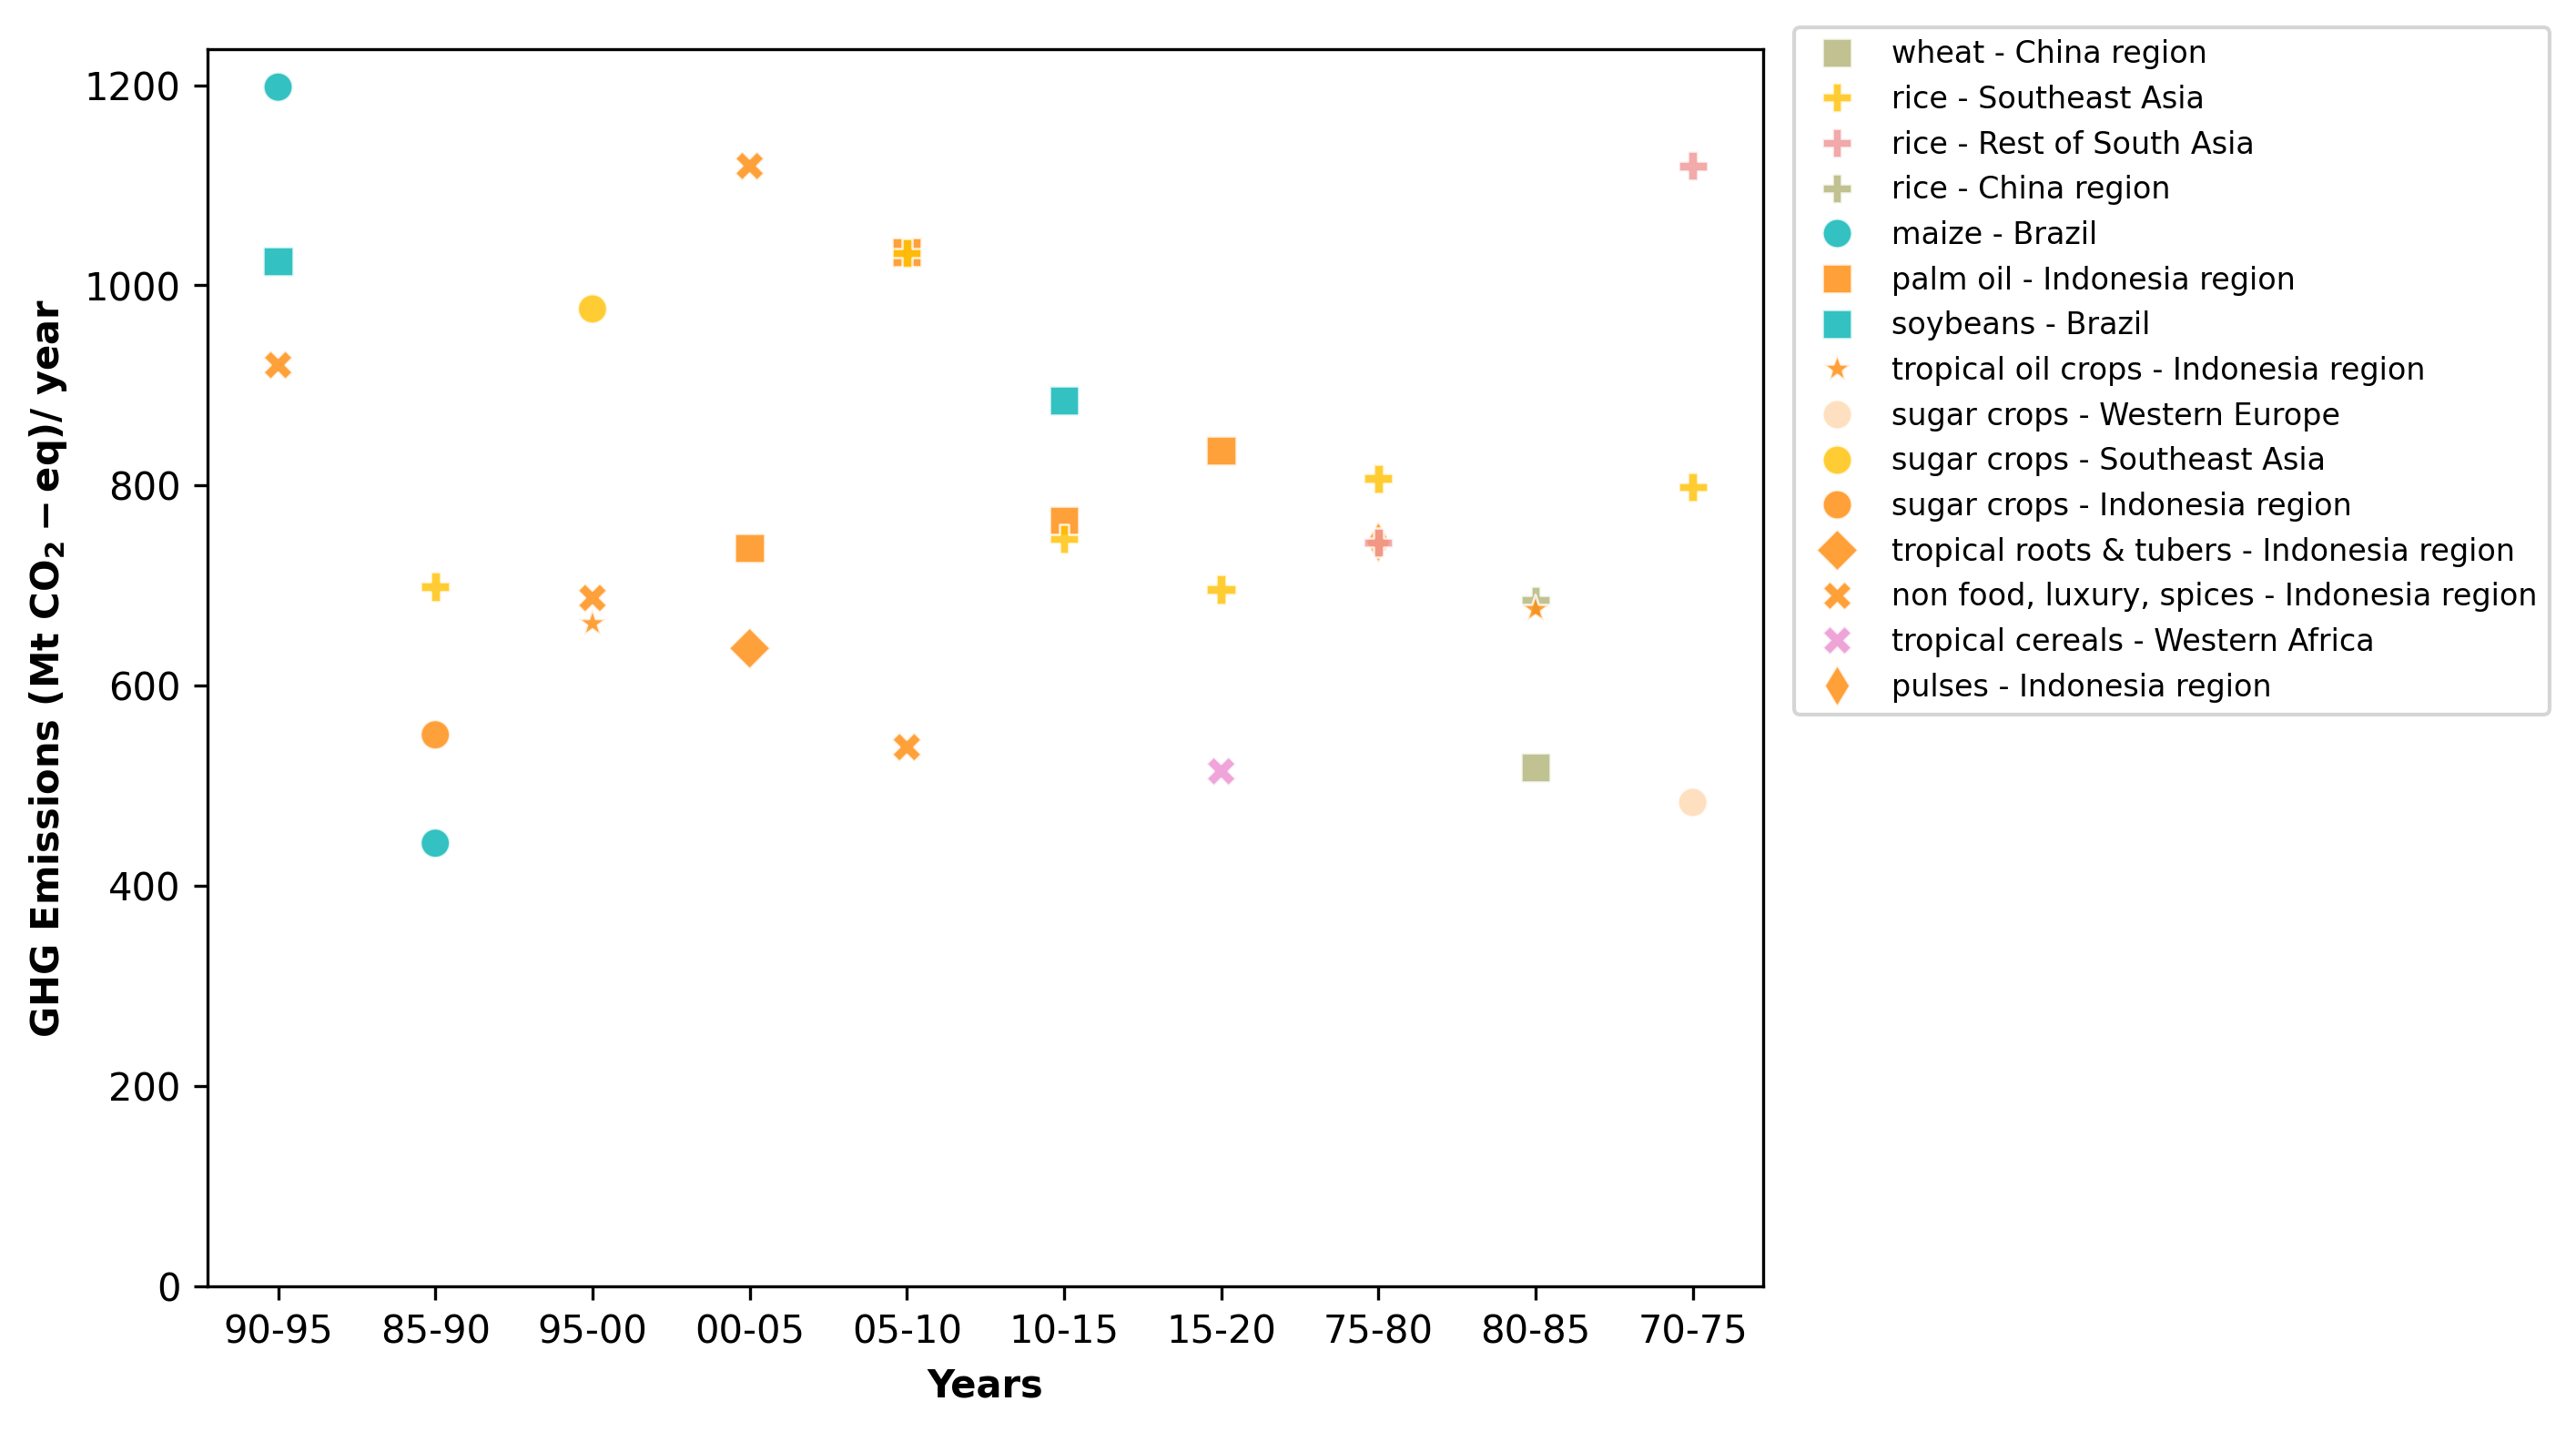

In [7]:
all_sources_group = all_sources_copy.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
all_sources_group = all_sources_group.reset_index()
all_sources_group = region_processing(all_sources_group)
all_sources_group = ngfbfc_processing(all_sources_group)
all_sources_group = all_sources_group[all_sources_group['NGFBFC'] != 'pasture']

all_sources_group_copy = all_sources_group.copy()
all_sources_group_copy.loc[:, range(start_year, end_year, 5)] = all_sources_group_copy[range(start_year, end_year, 5)].values * 1e3

all_sources_group_copy['IMAGE Realtion'] =  all_sources_group_copy['NGFBFC'] + " - "  + all_sources_group_copy['IMAGE Region Name']

all_sources_group_copy = all_sources_group_copy[list(range(start_year, end_year, 5)) + ['IMAGE Realtion']]

df_crops = all_sources_group_copy.melt(id_vars=['IMAGE Realtion'], var_name='Time', value_name='value')
df_crops = df_crops[df_crops['IMAGE Realtion'] != 'wheat - Rest of South Asia']

results_crops = {}

df_crops_sort = df_crops.sort_values(by=['value'], ascending=[True])

for time in df_crops_sort['Time'].unique():
    filtered_data = df_crops_sort[df_crops_sort['Time'] == time]
    sorted_data = filtered_data.sort_values(by='value', ascending=False)
    top_5_data = sorted_data.head(3)
    if time not in results_crops:
        results_crops[time] = {}
    results_crops[time] = top_5_data

df_crops_concat = pd.concat([pd.concat(results_crops.values())])

df_crops_copy = df_crops.copy()

time_map = {}
for n in range(start_year, end_year, 5):
    n_awal = n - 5
    time_map[n] = f'{str(n_awal)[2:]}-{str(n)[2:]}'

df_crops_concat_copy = df_crops_concat.copy()
df_crops_concat_copy['Time'] = df_crops_concat_copy['Time'].map(time_map)

df_crops_concat_copy_sorted = df_crops_concat_copy.sort_values(by=['Time', 'value'], ascending=[False, False])

plt.figure(figsize=(25, 6), dpi=300)
loc = plticker.MultipleLocator(base=1)

ax2 = plt.subplot(131)
ax2.set_ylabel(r"$\bf{GHG\ Emissions\ (Mt~CO_2-eq)/\ year}$", fontsize=10)
ax2.set_xlabel('Years',fontweight='bold', fontsize=10)

sns.scatterplot(x="Time", y="value", color='#DDDDDD',
                sizes=(100, 300), alpha=.3, data=df_crops_copy)

palette = {
    'maize - Brazil': "#00b2b2", 'soybeans - Brazil': "#00b2b2", 'pulses - Brazil': "#00b2b2",
    'wheat - China region': "#B2B377", 'rice - China region': "#B2B377", 'vegetables & fruits - China region': "#B2B377",
    'non food, luxury, spices - Indonesia region': "#FF8A08", 'palm oil - Indonesia region': "#FF8A08", 'tropical oil crops - Indonesia region': "#FF8A08",
    'tropical roots & tubers - Indonesia region':"#FF8A08", 'pulses - Indonesia region':"#FF8A08", 'sugar crops - Indonesia region':"#FF8A08",
    'soybeans - Rest of South America': "#254336",
    'rice - Rest of South Asia': "#EF9595",'wheat - Rest of South Asia': "#EF9595",
    'rice - India': "#EFB495",
    'rice - Southeast Asia': "#FFC100", 'tropical oil crops - Southeast Asia': "#FFC100", 'non food, luxury, spices - Southeast Asia': "#FFC100",
     'sugar crops - Southeast Asia': "#FFC100", 
    'tropical cereals - Western Africa': "#EC8FD0", 'tropical roots & tubers - Western Africa': "#EC8FD0",
    'sugar crops - Western Europe': "#FED8B1"
}


markers = {
    'rice - China region': "P", 'rice - Rest of South Asia': "P", 'rice - India': "P",'rice - Southeast Asia': "P",
    'palm oil - Indonesia region': 's', 
    'maize - Brazil': 'o', 
    'pulses - Brazil': "P", 'soybeans - Brazil': 's',
    'vegetables & fruits - China region': "P", 
    'wheat - China region': 's', 'wheat - Rest of South Asia': 's',
    'non food, luxury, spices - Indonesia region': 'X', 'non food, luxury, spices - Southeast Asia': 'o', 
    'soybeans - Rest of South America': 'o',
    'tropical oil crops - Southeast Asia': 's','tropical oil crops - Indonesia region': "*",
    'tropical cereals - Western Africa': 'X', 
    'tropical roots & tubers - Western Africa': "P", 'tropical roots & tubers - Indonesia region': "D",
    'sugar crops - Western Europe': 'o', 'sugar crops - Southeast Asia': 'o', 'sugar crops - Indonesia region' : 'o',
    'pulses - Indonesia region':"d"
}

legend_order = [
    'wheat - China region',
    'rice - Southeast Asia','rice - Rest of South Asia','rice - China region',
    'maize - Brazil',
    'palm oil - Indonesia region',
    'soybeans - Brazil', 
    'tropical oil crops - Indonesia region', 
    'sugar crops - Western Europe','sugar crops - Southeast Asia','sugar crops - Indonesia region', 
    'tropical roots & tubers - Indonesia region',
    'non food, luxury, spices - Indonesia region',
    'tropical cereals - Western Africa',
    'pulses - Indonesia region',
       ]

sns.scatterplot(x="Time", y="value", hue='IMAGE Realtion',alpha=.8, palette=palette, 
                style='IMAGE Realtion', markers=markers, s=60, 
                data=df_crops_concat_copy_sorted.sort_values(by=['IMAGE Realtion'], ascending=[True]), hue_order=legend_order)

ax2.legend(loc='lower left', bbox_to_anchor= (1.01, 0.45), ncol=1, prop={'size': 8})
ax2.xaxis.set_major_locator(loc)
ax2.set_ylim(ymin=0)
plt.show()

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/704908880.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  CF_emisi_total_GFRAC_area.loc[mask, 'CF'] = data1[0] / data2[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/704908880.py:39: RuntimeWarning: invalid value encountered in double_scalars
  CF_emisi_total_GFRAC_area.loc[mask, 'CF'] = data1[0] / data2[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/704908880.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  CF_emisi_total_GFRAC_area.loc[mask, 'CF'] = data1[0] / data2[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/704908880.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  CF_emisi_total_GFRAC_area.loc[mask, 'CF'] = data1[0] / data2[0]
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_876/704908880.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  CF_emisi_total_GFRAC_area.loc[mask, 'CF'] = data1[0] / data2[0]
C:\Users\HEFRYA~1\AppData\

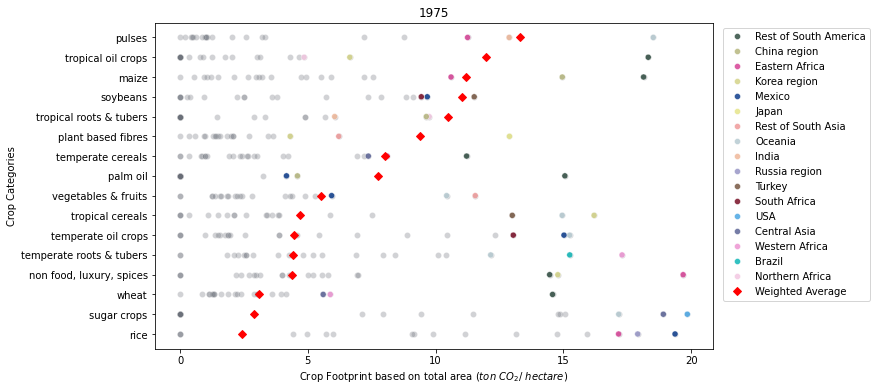

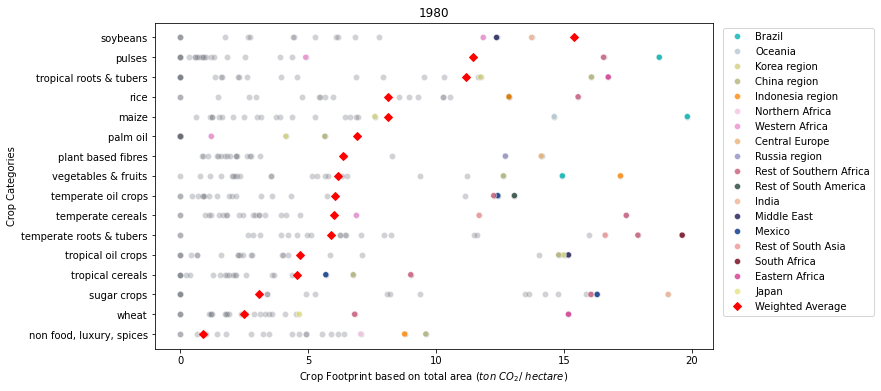

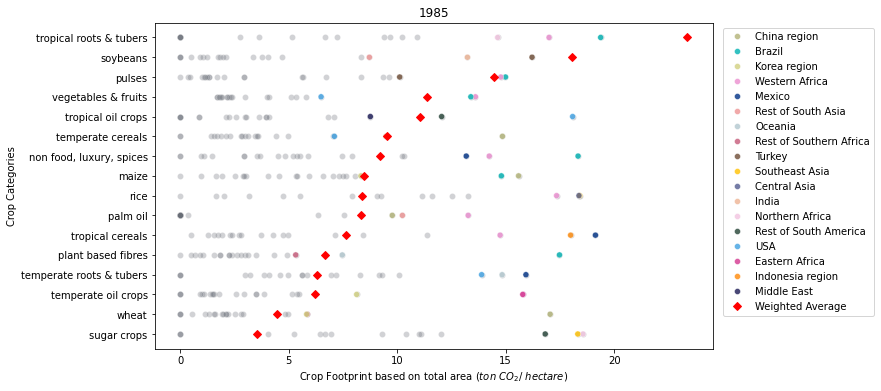

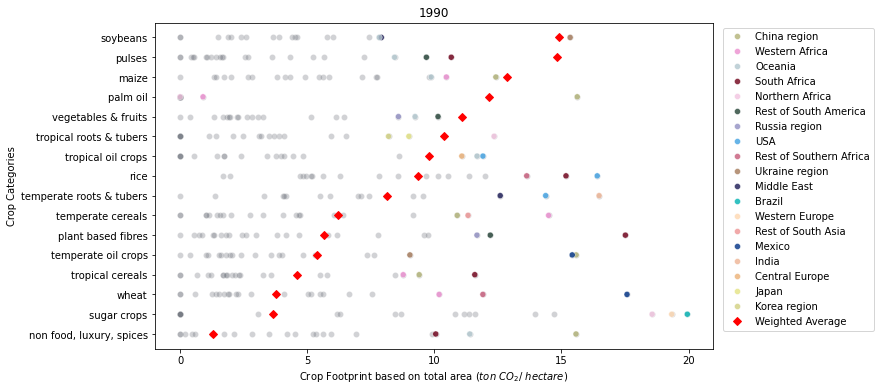

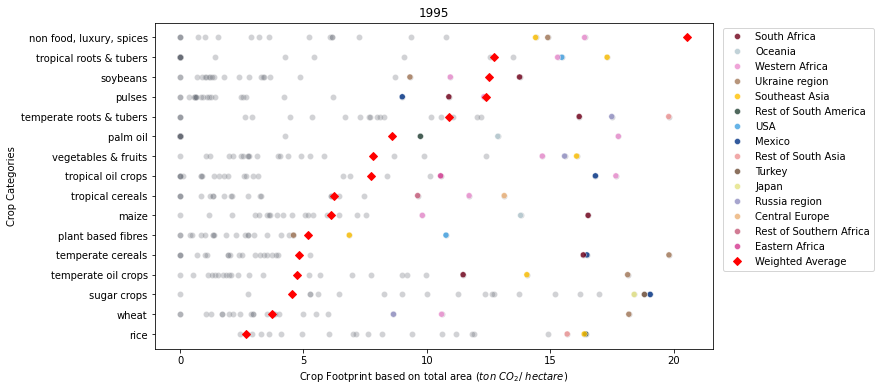

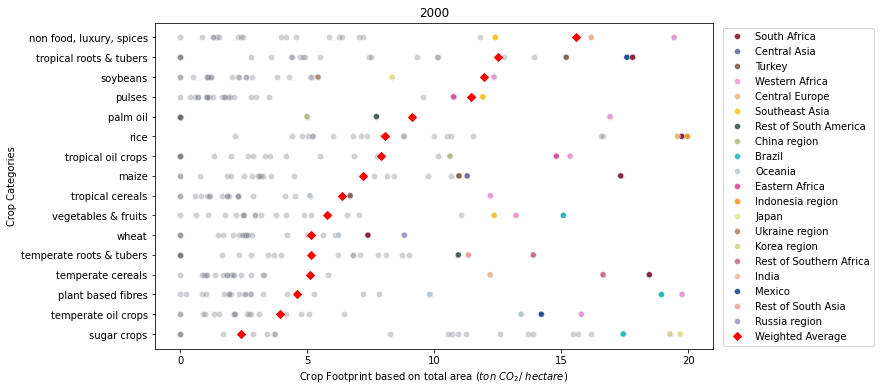

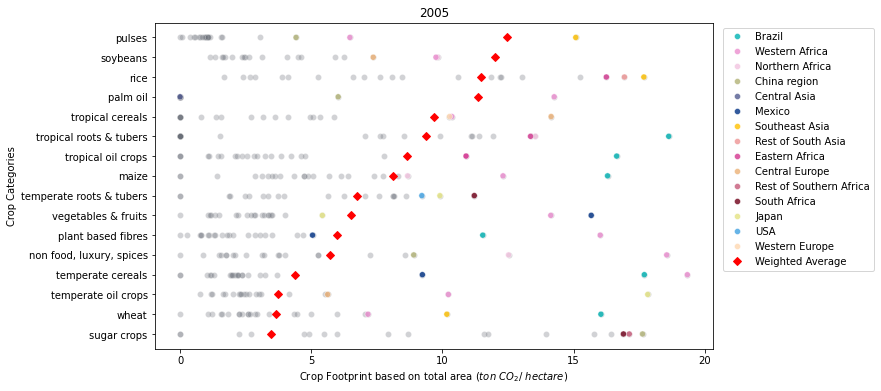

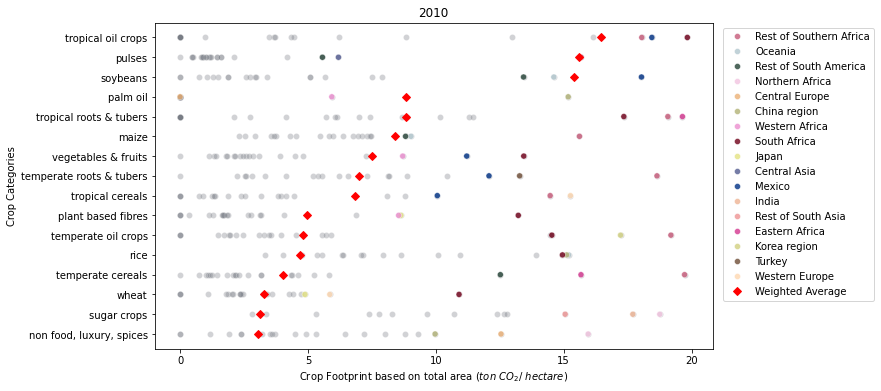

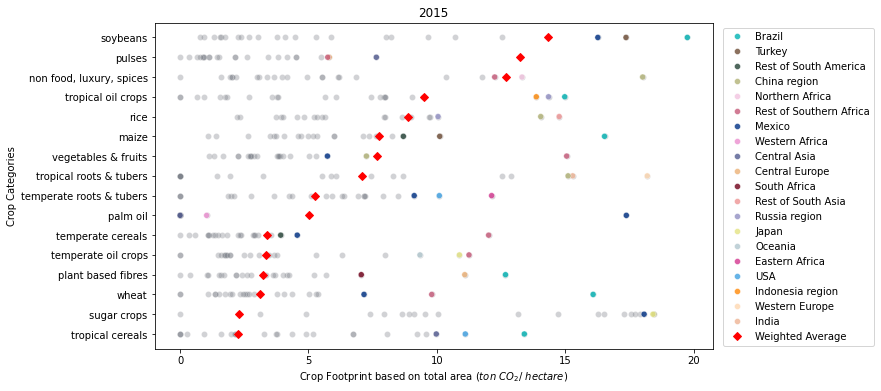

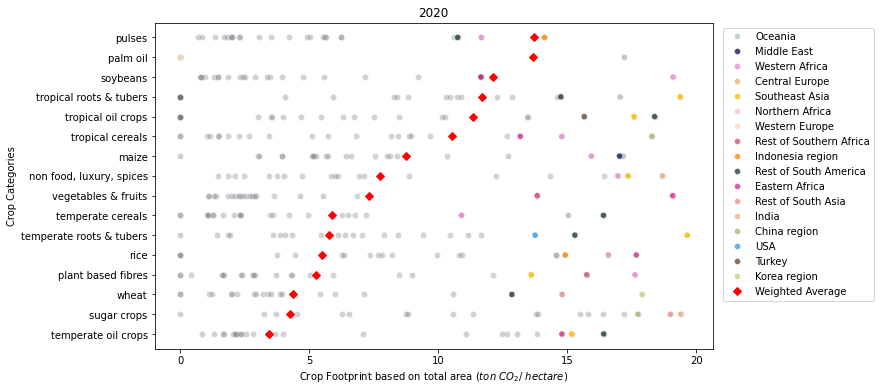

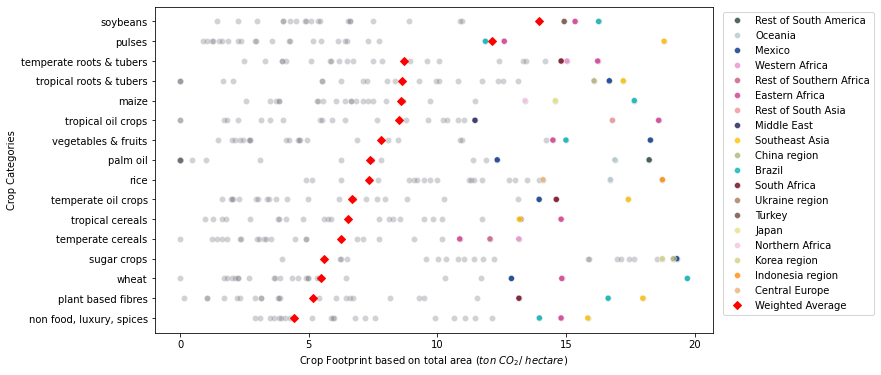

In [8]:
columns = ['IMAGE Region Name', 'NGFBFC'] + columns_year_analysis

df_all_sources_copy = all_sources.copy()
df_all_sources_copy = ngfbfc_processing(df_all_sources_copy)
df_all_sources_selected = df_all_sources_copy[~df_all_sources_copy['NGFBFC'].str.contains("pasture")]

df_all_sources_selected = df_all_sources_selected[columns]
df_all_sources_selected = df_all_sources_selected.groupby(['IMAGE Region Name', 'NGFBFC']).sum().reset_index()

df_all_sources_melt = df_all_sources_selected.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_all_sources_melt['value'] = df_all_sources_melt['value'] * 1e9

df_GFRACcombined_copy = df_GFRACcombined.copy()
df_GFRACcombined_copy = ngfbfc_processing(df_GFRACcombined_copy)
df_GFRACcombined_selected = df_GFRACcombined_copy[~df_GFRACcombined_copy['NGFBFC'].str.contains("grass")]

df_GFRACcombined_selected = pd.merge(left=country_code, right=df_GFRACcombined_selected, how="left", left_on="ISO Country", right_on="country")
df_GFRACcombined_selected = df_GFRACcombined_selected[columns]
df_GFRACcombined_selected = df_GFRACcombined_selected[~(df_GFRACcombined_selected['IMAGE Region Name'] == "N|A")]
df_GFRACcombined_selected = df_GFRACcombined_selected.groupby(['IMAGE Region Name', 'NGFBFC']).sum().reset_index()

df_GFRACcombined_melt = pd.melt(df_GFRACcombined_selected, id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')

CF_emisi_total_GFRAC_area = df_all_sources_melt.copy()
CF_emisi_total_GFRAC_area = CF_emisi_total_GFRAC_area.drop(columns=['value'])
IMAGERegionName	= CF_emisi_total_GFRAC_area["IMAGE Region Name"].to_list()
time = CF_emisi_total_GFRAC_area["time"].to_list()
ngfbfc = CF_emisi_total_GFRAC_area["NGFBFC"].to_list()

for region, time, ngfbfc in zip(IMAGERegionName, time, ngfbfc):
    try:
        data1 = df_all_sources_melt[(df_all_sources_melt['IMAGE Region Name'] == region) & (df_all_sources_melt['time'] == time) & (df_all_sources_melt['NGFBFC'] == ngfbfc)]['value'].to_numpy()
        data2 = df_GFRACcombined_melt[(df_GFRACcombined_melt['IMAGE Region Name'] == region) & (df_GFRACcombined_melt['time'] == time) & (df_GFRACcombined_melt['NGFBFC'] == ngfbfc)]['value'].to_numpy()
        if data1.size == 0:
            data1 = [0]
        if data2.size == 0: 
            data2 = [0]
        mask = df_all_sources_melt[(df_all_sources_melt['IMAGE Region Name'] == region) & (df_all_sources_melt['time'] == time) & (df_all_sources_melt['NGFBFC'] == ngfbfc)].index
        CF_emisi_total_GFRAC_area.loc[mask, 'CF'] = data1[0] / data2[0]
    except KeyError as e:
        print(f"Error: {e} for region {region}")

CF_emisi_total_GFRAC_area['CF'] = CF_emisi_total_GFRAC_area['CF'].replace([np.inf, -np.inf], np.nan).fillna(0)

df_GFRAC_Area = pd.read_csv("D:/kerja/asisten riset/code v/review/GFRAC_Area_Harvested_combined.csv")

df_GFRAC_Area_copy = df_GFRAC_Area.copy()
df_GFRAC_Area_copy = df_GFRAC_Area_copy[df_GFRAC_Area_copy['time'] >= start_year]
df_GFRAC_Area_copy = ngfbfc_processing(df_GFRAC_Area_copy)
df_GFRAC_Area_selected = df_GFRAC_Area_copy[~df_GFRAC_Area_copy['NGFBFC'].str.contains("grass")]

CF_emisi_total_AH = df_all_sources_melt.copy()
CF_emisi_total_AH = CF_emisi_total_AH.drop(columns=['value'])
IMAGERegionName = CF_emisi_total_AH["IMAGE Region Name"].to_list()
time = CF_emisi_total_AH["time"].to_list()
ngfbfc = CF_emisi_total_AH["NGFBFC"].to_list()

for region, time, ngfbfc in zip(IMAGERegionName, time, ngfbfc):
    try:
        data1 = df_all_sources_melt[(df_all_sources_melt['IMAGE Region Name'] == region) & (df_all_sources_melt['time'] == time) & (df_all_sources_melt['NGFBFC'] == ngfbfc)]['value'].to_numpy()
        data2 = df_GFRAC_Area_selected[(df_GFRAC_Area_selected['IMAGE Region Name'] == region) & (df_GFRAC_Area_selected['time'] == time) & (df_GFRAC_Area_selected['NGFBFC'] == ngfbfc)]['value'].to_numpy()
        if data1.size == 0:
            data1 = [0]
        if data2.size == 0: 
            data2 = [0]
        mask = df_all_sources_melt[(df_all_sources_melt['IMAGE Region Name'] == region) & (df_all_sources_melt['time'] == time) & (df_all_sources_melt['NGFBFC'] == ngfbfc)].index
        CF_emisi_total_AH.loc[mask, 'CF'] = data1[0] / data2[0]
    except KeyError as e:
        print(f"Error: {e} for region {region}")

CF_emisi_total_AH['CF'] = CF_emisi_total_AH['CF'].replace([np.inf, -np.inf], np.nan).fillna(0)

df1 = CF_emisi_total_AH.copy()
df2 = df_GFRAC_Area_selected.copy()

df1.loc[df1['CF'] > 50, 'CF'] = 0
df1 = ngfbfc_processing(df1)
df2 = ngfbfc_processing(df2)

data1 = np.zeros((10, 16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((10, 16, 26), dtype='float32')
result_average = np.zeros((16, 10), dtype='float32')
for n, time in enumerate(range(start_year, end_year, 5)):
    for i, ngfbfc in enumerate(df1['NGFBFC'].unique()):
        for j, image_region in enumerate(df2['IMAGE Region Name'].unique()):
            ngfbfc_areaharves = df2[(df2['time'] == time) & (df2['IMAGE Region Name'] == image_region) & (df2['NGFBFC'] == ngfbfc)]['value'].replace([np.inf, -np.inf], np.nan).values
            average_AreaHarvested_RegionCrops[n][i][j] = np.nan_to_num(ngfbfc_areaharves)

for n, time in enumerate(range(start_year, end_year, 5)):
    for i, ngfbfc in enumerate(df1['NGFBFC'].unique()):
        carbon_footprint = df1[(df1['time'] == time) & (df1['NGFBFC'] == ngfbfc)]['CF'].replace([np.inf, -np.inf], np.nan).values
        data1[n][i] = np.nan_to_num(carbon_footprint)

for i, ngfbfc in enumerate(df1['NGFBFC'].unique()):    
    for n, time in enumerate(range(start_year, end_year, 5)):
        result_average[i][n] = np.average(data1[n][i], weights=average_AreaHarvested_RegionCrops[n][i])

df_avg = pd.DataFrame(result_average, index=[df2['NGFBFC'].unique()], columns=list(range(start_year, end_year, 5)))
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"level_0" : 'NGFBFC'})
df_avg_melt = pd.melt(
    df_avg, 
    id_vars=["NGFBFC"],  # Kolom yang tetap
    var_name="time",     # Nama kolom untuk nilai tahun
    value_name="value"   # Nama kolom untuk nilai data
)
df_avg = df_avg_melt.sort_values(by=['value', 'NGFBFC'], ascending=[False, False])

results = {}

for category in df_avg['NGFBFC'].unique():
    for time in range(start_year, end_year, 5):
        filtered_data = df_avg[(df_avg['NGFBFC'] == category) & (df_avg['time'] == time)]
        sorted_data = filtered_data.sort_values(by='value', ascending=False)
        top_5_data = sorted_data.head(3)
        if time not in results:
            results[time] = {}
        results[time][category] = top_5_data

df_avg = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_avg = df_avg.sort_values(by=['time', 'value'], ascending=[True, False])
df_avg = ngfbfc_processing(df_avg)

produk_diulang = np.array([item for item in df_avg[df_avg['time'] == 1980]['NGFBFC'].to_list() for _ in range(1)])

df_footprint_region = region_processing(df1)
df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values

average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC', 'time'], value_name='value') 
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & (average1_melt['IMAGE Region Name'] == "Japan"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "South Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "USA"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & (average1_melt['IMAGE Region Name'] == "Russia region"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]

average1_melt.index = average1_melt['NGFBFC'].values
average1_filtered = average1_melt[average1_melt['value'] < 20]
average1_new = average1_filtered.sort_values(by=['value', 'NGFBFC'], ascending=[True, True])

results = {}
for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        for time in range(1975, 2021, 5):
            filtered_data = average1_new[(average1_new['NGFBFC'] == category) & (average1_new['time'] == time)]
            sorted_data = filtered_data.sort_values(by='value', ascending=False)
            top_5_data = sorted_data.head(3)
            if time not in results:
                results[time] = {}
            results[time][category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_footprint_df_filtered = df_footprint_df[df_footprint_df['value'] < 20]

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3','Rest of Southern Africa':'#C75B7A','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

for time in range(1975, 2021, 5):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Crop Footprint based on total area ($ton~CO_2/~hectare$)')
    ax.set_ylabel('Crop Categories')

    plt.title(f"{time}")
    
    produk_diulang = np.array([item for item in df_avg[df_avg['time'] == time]['NGFBFC'].to_list() for _ in range(1)])

    sns.scatterplot(x="value", y="NGFBFC", color='#686D76', sizes=(100, 300), alpha=.3, data=average1_filtered[average1_filtered['time'] == time].loc[produk_diulang])

    sns.scatterplot(x="value", y="NGFBFC", hue='IMAGE Region Name', sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered[df_footprint_df_filtered['time'] == time])

    ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.plot(df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['value'].to_numpy(), df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')
    
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    weighted_average_index = legend_labels.index('Weighted Average')
    weighted_average_handle = legend_handles.pop(weighted_average_index)
    weighted_average_label = legend_labels.pop(weighted_average_index)
    legend_handles.append(weighted_average_handle)
    legend_labels.append(weighted_average_label)

    ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.xaxis.set_major_locator(MultipleLocator(5))

    plt.show()

df1 = CF_emisi_total_AH.copy()
df2 = df_GFRAC_Area_selected.copy()

df1.loc[df1['CF'] > 50, 'CF'] = 0
df1 = ngfbfc_processing(df1)
df2 = ngfbfc_processing(df2)

data1 = np.zeros((16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((16, 26), dtype='float32')
result_average = np.zeros((16), dtype='float32')

for i, ngfbfc in enumerate(df1['NGFBFC'].unique()):
    for n, image_region in enumerate(df2['IMAGE Region Name'].unique()):
        ngfbfc_areaharves = df2[(df2['IMAGE Region Name'] == image_region) & (df2['NGFBFC'] == ngfbfc) & (df2['value'] > 0)]['value'].replace([np.inf, -np.inf], np.nan).mean()
        average_AreaHarvested_RegionCrops[i][n] = np.nan_to_num(ngfbfc_areaharves)

for i, ngfbfc in enumerate(df1['NGFBFC'].unique()):
    carbon_footprint = df1[df1['NGFBFC'] == ngfbfc]['CF'].replace([np.inf, -np.inf], np.nan).mean()
    data1[i] = np.nan_to_num(carbon_footprint)

for x in range(0, 16):
    result_average[x] = np.average(data1[x], weights=average_AreaHarvested_RegionCrops[x])

df_avg = pd.DataFrame(result_average, index=df2['NGFBFC'].unique(), columns=['value'])
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"index":'NGFBFC'})
df_avg = df_avg.sort_values(by=['value'], ascending=[False])

produk_diulang = np.array([item for item in df_avg['NGFBFC'].to_list() for _ in range(1)])

df_footprint_region = region_processing(df1)
df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index_drop = df_footprint_region_index_drop.drop(columns=['time'])
df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values

average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC'], value_name='value') 
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & (average1_melt['IMAGE Region Name'] == "Japan"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "South Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "USA"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & (average1_melt['IMAGE Region Name'] == "Russia region"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]

average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].mean().to_frame('Mean')
average1 = average.reset_index()

average1.index = average1['NGFBFC'].values
average1_filtered = average1[average1['Mean'] < 20]
average1_new = average1_filtered.sort_values(by=['Mean', 'NGFBFC'], ascending=[True, True])

results = {}
for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        filtered_data = average1_new[average1_new['NGFBFC'] == category]
        sorted_data = filtered_data.sort_values(by='Mean', ascending=False)
        top_5_data = sorted_data.head(3)
        results[category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results.values())])
df_footprint_df_filtered = df_footprint_df[df_footprint_df['Mean'] < 20]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Crop Footprint based on total area ($ton~CO_2/~hectare$)')
ax.set_ylabel('Crop Categories')

sns.scatterplot(x="Mean", y="NGFBFC", color='#686D76', sizes=(100, 300), alpha=.3, data=average1_filtered.loc[produk_diulang])
sns.scatterplot(x="Mean", y="NGFBFC", hue='IMAGE Region Name', sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered)

ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
ax.plot(df_avg['value'].to_numpy(), df_avg['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')

legend_handles, legend_labels = ax.get_legend_handles_labels()
weighted_average_index = legend_labels.index('Weighted Average')
weighted_average_handle = legend_handles.pop(weighted_average_index)
weighted_average_label = legend_labels.pop(weighted_average_index)
legend_handles.append(weighted_average_handle)
legend_labels.append(weighted_average_label)

ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
ax.xaxis.set_major_locator(MultipleLocator(5))

plt.show()

In [ ]:
emisi_total_copy = all_sources.copy()
emisi_total_copy = ngfbfc_processing(emisi_total_copy)
emisi_total_copy = emisi_total_copy[emisi_total_copy['NGFBFC'] != "pasture"]
emisi_total_groupby = emisi_total_copy.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
emisi_total_groupby = emisi_total_groupby.reset_index()
emisi_total_groupby = emisi_total_groupby.drop(columns=['emissions'])

emisi_total_melted = pd.melt(emisi_total_groupby, id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
emisi_total_melted_groupby = emisi_total_melted.groupby(['IMAGE Region Name', 'time', 'NGFBFC']).sum()
emisi_total_melted_groupby = emisi_total_melted_groupby.reset_index()
emisi_total_melted_groupby['value'] = emisi_total_melted_groupby['value'] * 1E9

fao_prod_copy = w_factor_intensity.copy()
fao_prod_copy = ngfbfc_processing(fao_prod_copy)
fao_prod_copy = fao_prod_copy[fao_prod_copy['time'] >= start_year]

df_intensity_region = fao_prod_copy.copy()
for region, time, ngfbfc in zip(df_intensity_region["IMAGE Region Name"].to_list(), df_intensity_region["time"].to_list(), df_intensity_region["NGFBFC"].to_list()):
    try:
        data1 = fao_prod_copy[(fao_prod_copy['IMAGE Region Name'] == region) & (fao_prod_copy['time'] == time) & (fao_prod_copy['NGFBFC'] == ngfbfc)]['FAO Production'].to_numpy()
        data2 = emisi_total_melted_groupby[(emisi_total_melted_groupby['IMAGE Region Name'] == region) & (emisi_total_melted_groupby['time'] == time) & (emisi_total_melted_groupby['NGFBFC'] == ngfbfc)]['value'].to_numpy()
        if data1.size == 0:
            data1 = [0]
        if data2.size == 0: 
            data2 = [0]
        mask = df_intensity_region[(df_intensity_region['IMAGE Region Name'] == region) & (df_intensity_region['time'] == time) & (df_intensity_region['NGFBFC'] == ngfbfc)].index
        df_intensity_region.loc[mask, 'Carbon Intensity'] =  data2[0] / data1[0]
    
    except (KeyError, ZeroDivisionError) as e:
        print(f"Error: {e} for region {region}")

df_intensity_region = df_intensity_region.drop(columns=['FAO Production'])
df_intensity_region['Carbon Intensity'] = df_intensity_region['Carbon Intensity'].replace([np.inf, -np.inf], np.nan)
df_intensity_region['Carbon Intensity'] = df_intensity_region['Carbon Intensity'].fillna(0)

df_ittertols = df_footprint_region.rename(columns={'type': 'NGFBFC'})
df_ittertols = df_ittertols.drop(columns=['CF'])

df1_copy = df_intensity_region.copy()
df2_copy = w_factor_intensity.copy()

df1_copy.loc[df1_copy['Carbon Intensity'] > 50, 'Carbon Intensity'] = 0
df1_copy = ngfbfc_processing(df1_copy)
df2_copy = ngfbfc_processing(df2_copy)

df_itertools_copy1 = df_ittertols.copy()
df_itertools_copy1["Carbon Intensity"] = 0.0
df1_copy = df_itertools_copy1.merge(df1_copy , how='left', left_on=['IMAGE Region Name', 'time', 'NGFBFC'], right_on=['IMAGE Region Name', 'time', 'NGFBFC'])
df1_copy = df1_copy.drop(columns=['Carbon Intensity_x']).rename(columns={"Carbon Intensity_y": "Carbon Intensity"})

df_itertools_copy2 = df_ittertols.copy()
df_itertools_copy2["FAO Production"] = 0.0
df2_copy = df_itertools_copy2.merge(df2_copy , how='left', left_on=['IMAGE Region Name', 'time', 'NGFBFC'], right_on=['IMAGE Region Name', 'time', 'NGFBFC'])
df2_copy = df2_copy.drop(columns=['FAO Production_x']).rename(columns={"FAO Production_y": "FAO Production"})

data1 = np.zeros((10, 16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((10, 16, 26), dtype='float32')
result_average = np.zeros((16, 10), dtype='float32')

for n, time in enumerate(range(start_year, end_year, 5)):
    for i, ngfbfc in enumerate(df1_copy['NGFBFC'].unique()):
        for j, image_region in enumerate(df2_copy['IMAGE Region Name'].unique()):
            ngfbfc_areaharves = df2_copy[(df2_copy['time'] == time) & (df2_copy['IMAGE Region Name'] == image_region) & (df2_copy['NGFBFC'] == ngfbfc)]['FAO Production'].replace([np.inf, -np.inf], np.nan).values
            average_AreaHarvested_RegionCrops[n][i][j] = np.nan_to_num(ngfbfc_areaharves)

for n, time in enumerate(range(start_year, end_year, 5)):
    for i, ngfbfc in enumerate(df1_copy['NGFBFC'].unique()):
        carbon_footprint = df1_copy[(df1_copy['time'] == time) & (df1_copy['NGFBFC'] == ngfbfc)]['Carbon Intensity'].replace([np.inf, -np.inf], np.nan).values
        data1[n][i] = np.nan_to_num(carbon_footprint)

for i, ngfbfc in enumerate(df1_copy['NGFBFC'].unique()):   
    for n, time in enumerate(range(start_year, end_year, 5)):
        result_average[i][n] = np.average(data1[n][i], weights=average_AreaHarvested_RegionCrops[n][i])

df_avg = pd.DataFrame(result_average, index=[df2_copy['NGFBFC'].unique()], columns=list(range(start_year, end_year, 5)))
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"level_0":'NGFBFC'})
df_avg_melt = pd.melt(
    df_avg, 
    id_vars=["NGFBFC"], 
    var_name="time",     
    value_name="value"   
)
df_avg = df_avg_melt.sort_values(by=['value', 'NGFBFC'], ascending=[False, False])

results = {}

for category in df_avg['NGFBFC'].unique():
    for time in range(start_year, end_year, 5):
        filtered_data = df_avg[(df_avg['NGFBFC'] == category) & (df_avg['time'] == time)]
        sorted_data = filtered_data.sort_values(by='value', ascending=False)
        top_5_data = sorted_data.head(3)
        if time not in results:
            results[time] = {}
        results[time][category] = top_5_data

df_avg = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_avg = df_avg.sort_values(by=['time', 'value'], ascending=[True, False])

df_footprint_region = region_processing(df1_copy)
df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values
  
average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC', 'time'], value_name='value') 
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & (average1_melt['IMAGE Region Name'] == "Japan"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "South Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & (average1_melt['IMAGE Region Name'] == "USA"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & (average1_melt['IMAGE Region Name'] == "Russia region"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]

average1_melt.index = average1_melt['NGFBFC'].values
average1_filtered = average1_melt[average1_melt['value'] < 20]

results = {}
average1_new = average1_filtered.sort_values(by=['value', 'NGFBFC'], ascending=[True, True])

for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        for time in range(start_year, end_year, 5):
            filtered_data = average1_new[(average1_new['NGFBFC'] == category) & (average1_new['time'] == time)]
            sorted_data = filtered_data.sort_values(by='value', ascending=False)
            top_5_data = sorted_data.head(3)
            if time not in results:
                results[time] = {}
            results[time][category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_footprint_df_filtered = df_footprint_df[df_footprint_df['value'] < 20]


palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3','Rest of Southern Africa':'#C75B7A','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

for time in range(start_year, end_year, 5):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Crop Footprint based on total area ($ton~CO_2/~hectare$)')
    ax.set_ylabel('Crop Categories')

    plt.title(f"{time}")
    
    produk_diulang = np.array([item for item in df_avg[df_avg['time'] == time]['NGFBFC'].to_list() for _ in range(1)])

    sns.scatterplot(x="value", y="NGFBFC", color='#686D76', sizes=(100, 300), alpha=.3, data=average1_filtered[average1_filtered['time'] == time].loc[produk_diulang])
    sns.scatterplot(x="value", y="NGFBFC", hue='IMAGE Region Name', sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered[df_footprint_df_filtered['time'] == time])

    ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.plot(df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['value'].to_numpy(), df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    weighted_average_index = legend_labels.index('Weighted Average')
    weighted_average_handle = legend_handles.pop(weighted_average_index)
    weighted_average_label = legend_labels.pop(weighted_average_index)
    legend_handles.append(weighted_average_handle)
    legend_labels.append(weighted_average_label)

    ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.xaxis.set_major_locator(MultipleLocator(5))

    plt.show()

df1_copy = df_intensity_region.copy()
df2_copy  = w_factor_intensity.copy()

df1_copy.loc[df1_copy['Carbon Intensity'] > 50, 'Carbon Intensity'] = 0
df1_copy= ngfbfc_processing(df1_copy)
df2_copy = ngfbfc_processing(df2_copy)

df2_copy = df2_copy[~((df2_copy['time'] <= 1990) & (df2_copy['IMAGE Region Name'] == "Russia"))]
df2_copy = df2_copy[df2_copy['time'] >= start_year]

data1 = np.zeros((16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((16, 26), dtype='float32')
result_average = np.zeros((16), dtype='float32')

for i, ngfbfc in enumerate(df1_copy['NGFBFC'].unique()):
    for n, image_region in enumerate(df2_copy['IMAGE Region Name'].unique()):
        ngfbfc_areaharves = df2_copy[(df2_copy['IMAGE Region Name'] == image_region) & (df2_copy['NGFBFC'] == ngfbfc) & (df2_copy['FAO Production'] > 0)]['FAO Production'].replace([np.inf, -np.inf], np.nan).mean()
        average_AreaHarvested_RegionCrops[i][n] = np.nan_to_num(ngfbfc_areaharves)

for i, ngfbfc in enumerate(df1_copy['NGFBFC'].unique()):
    carbon_footprint = df1_copy[df1_copy['NGFBFC'] == ngfbfc]['Carbon Intensity'].replace([np.inf, -np.inf], np.nan).mean()
    data1[i] = np.nan_to_num(carbon_footprint)

for i, ngfbfc in enumerate(df1_copy['NGFBFC'].unique()):   
    result_average[i] = np.average(data1[i], weights=average_AreaHarvested_RegionCrops[i])
    
df_avg = pd.DataFrame(result_average, index=df2_copy['NGFBFC'].unique())
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"index":'NGFBFC', 0:"value"})
df_avg = df_avg.sort_values(by=['value'], ascending=[False])

df_footprint_region = region_processing(df1_copy)
df_footprint_region = df_footprint_region[~((df_footprint_region['time'] <= 1990) & (df_footprint_region['IMAGE Region Name'] == "Russia"))] 

df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index.index = df_footprint_region_index['NGFBFC'].values

produk_diulang = np.array([item for item in df_avg['NGFBFC'].to_list() for _ in range(1)])
df_footprint_region_index = df_footprint_region_index.loc[produk_diulang]
df_footprint_region_index = df_footprint_region_index.drop(columns=['time'])

average1_melt = df_footprint_region_index.melt(id_vars=['NGFBFC'], value_name='value') 
average1_melt['value'] = average1_melt['value'].fillna(0)

average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].apply(custom_mean).to_frame('Mean').reset_index()

average.index = average['NGFBFC'].values
average_filtered = average[average['Mean'] < 25]

results = {}
average1_new = average_filtered.sort_values(by=['Mean', 'NGFBFC'], ascending=[True, True])

average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Canada"))]
average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Central America"))]
average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Japan"))]
average1_new = average1_new[~((average1_new['IMAGE Region Name'] == "Central Europe"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "palm oil") & (average1_new['IMAGE Region Name'] == "South Africa"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "palm oil") & (average1_new['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "palm oil") & (average1_new['IMAGE Region Name'] == "USA"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "non food, luxury, spices") & (average1_new['IMAGE Region Name'] == "Russia region"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "soybeans") & (average1_new['IMAGE Region Name'] == "Southeast Asia"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "soybeans") & (average1_new['IMAGE Region Name'] == "Indonesia region"))]
average1_new = average1_new[~((average1_new['NGFBFC'] == "plant based fibres") & (average1_new['IMAGE Region Name'] == "Ukraine region"))]

for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        filtered_data = average1_new[average1_new['NGFBFC'] == category]
        sorted_data = filtered_data.sort_values(by='Mean', ascending=False)
        top_5_data = sorted_data.head(3)
        results[category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results.values())])

df_footprint_df_filtered = df_footprint_df[df_footprint_df['Mean'] < 25]


fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Crop Emission Intensity ($ton~CO_2-eq/~tonne~crop$)')
ax.set_ylabel('Crop Categories')

sns.scatterplot(x="Mean", y="NGFBFC", color='#686D76', sizes=(100, 300), alpha=.3, data=average1_new.loc[produk_diulang])
sns.scatterplot(x="Mean", y="NGFBFC", hue='IMAGE Region Name', sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered)

ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
ax.plot(df_avg['value'].to_numpy(), df_avg['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')

legend_handles, legend_labels = ax.get_legend_handles_labels()
weighted_average_index = legend_labels.index('Weighted Average')
weighted_average_handle = legend_handles.pop(weighted_average_index)
weighted_average_label = legend_labels.pop(weighted_average_index)
legend_handles.append(weighted_average_handle)
legend_labels.append(weighted_average_label)

ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')

plt.show()